In [1]:
import os
os.environ["KMP_WARNINGS"] = "off"
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [3]:
common_config.figure_journal_basic()

In [4]:
import pertpy as pt
import scanpy as sc
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib
import seaborn as sns
import numpy as np

In [5]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [6]:
G1_CYCLE = [
    "CDKN1A",
    {"CDKN1B", "CDKN1A"},
    "CDKN1B",
    {"CDKN1C", "CDKN1A"},
    {"CDKN1C", "CDKN1B"},
    "CDKN1C",
]

ERYTHROID = [
    {"CBL", "CNN1"},
    {"CBL", "PTPN12"},
    {"CBL", "PTPN9"},
    {"CBL", "UBASH3B"},
    {"SAMD1", "PTPN12"},
    {"SAMD1", "UBASH3B"},
    {"UBASH3B", "CNN1"},
    {"UBASH3B", "PTPN12"},
    {"UBASH3B", "PTPN9"},
    {"UBASH3B", "UBASH3A"},
    {"UBASH3B", "ZBTB25"},
    {"BPGM", "SAMD1"},
    "PTPN1",
    {"PTPN12", "PTPN9"},
    {"PTPN12", "UBASH3A"},
    {"PTPN12", "ZBTB25"},
    {"UBASH3A", "CNN1"},
]

PIONEER_FACTORS = [
    {"FOXA1", "FOXF1"},
    {"FOXA1", "FOXL2"},
    {"FOXA1", "HOXB9"},
    {"FOXA3", "FOXA1"},
    {"FOXA3", "FOXF1"},
    {"FOXA3", "FOXL2"},
    {"FOXA3", "HOXB9"},
    "FOXA3",
    {"FOXF1", "FOXL2"},
    {"FOXF1", "HOXB9"},
    {"FOXL2", "MEIS1"},
    "HOXA13",
    "HOXC13",
    {"POU3F2", "FOXL2"},
    "TP73",
    "MIDN",
    {"LYL1", "IER5L"},
    "HOXC13",
    {"DUSP9", "SNAI1"},
    {"ZBTB10", "SNAI1"},
]

GRANULOCYTE_APOPTOSIS = [
    "SPI1",
    "CEBPA",
    {"CEBPB", "CEBPA"},
    "CEBPB",
    {"CEBPE", "CEBPA"},
    {"CEBPE", "CEBPB"},
    {"CEBPE", "RUNX1T1"},
    {"CEBPE", "SPI1"},
    "CEBPE",
    {"ETS2", "CEBPE"},
    {"KLF1", "CEBPA"},
    {"FOSB", "CEBPB"},
    {"FOSB", "CEBPE"},
    {"ZC3HAV1", "CEBPA"},
    {"JUN", "CEBPA"},
]

PRO_GROWTH = [
    {"CEBPE", "KLF1"},
    "KLF1",
    {"KLF1", "BAK1"},
    {"KLF1", "MAP2K6"},
    {"KLF1", "TGFBR2"},
    "ELMSAN1",
    {"MAP2K3", "SLC38A2"},
    {"MAP2K3", "ELMSAN1"},
    "MAP2K3",
    {"MAP2K3", "MAP2K6"},
    {"MAP2K6", "ELMSAN1"},
    "MAP2K6",
    {"MAP2K6", "KLF1"},
]

MEGAKARYOCYTE = [
    {"MAPK1", "TGFBR2"},
    "MAPK1",
    {"ETS2", "MAPK1"},
    "ETS2",
    {"CEBPB", "MAPK1"},
]

programmes = {
    "G1 cell cycle": G1_CYCLE,
    "Erythroid": ERYTHROID,
    "Pioneer factors": PIONEER_FACTORS,
    "Granulocyte apoptosis": GRANULOCYTE_APOPTOSIS,
    "Pro-growth": PRO_GROWTH,
    "Megakaryocyte": MEGAKARYOCYTE,
}

In [7]:
adata = sc.read_h5ad("norman/data/norman_preprocessed.h5ad")
adata.obs["guide_ids"] = adata.obs["guide_ids"].cat.rename_categories({"": "control"})
adata

AnnData object with n_obs × n_vars = 111255 × 4000
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', 'g

In [8]:
gene_programme = []

for target_pert in adata.obs["perturbation_name"]:
    if target_pert == "control":
        gene_programme.append("Control")
        continue

    found_programme = False
    for programme, pert_list in programmes.items():
        for pert in pert_list:
            if (type(pert) == set and pert == set(target_pert.split("+"))) or (
                target_pert == pert
            ):
                gene_programme.append(programme)
                found_programme = True
                break

    if not found_programme:
        gene_programme.append("Unknown")

adata.obs["gene_programme"] = gene_programme
adata.obs["gene_programme"] = adata.obs["gene_programme"].astype("category")

In [6]:
psadata_classifier = sc.read("norman/output/no_mixscape_psadata_classifier.h5ad")

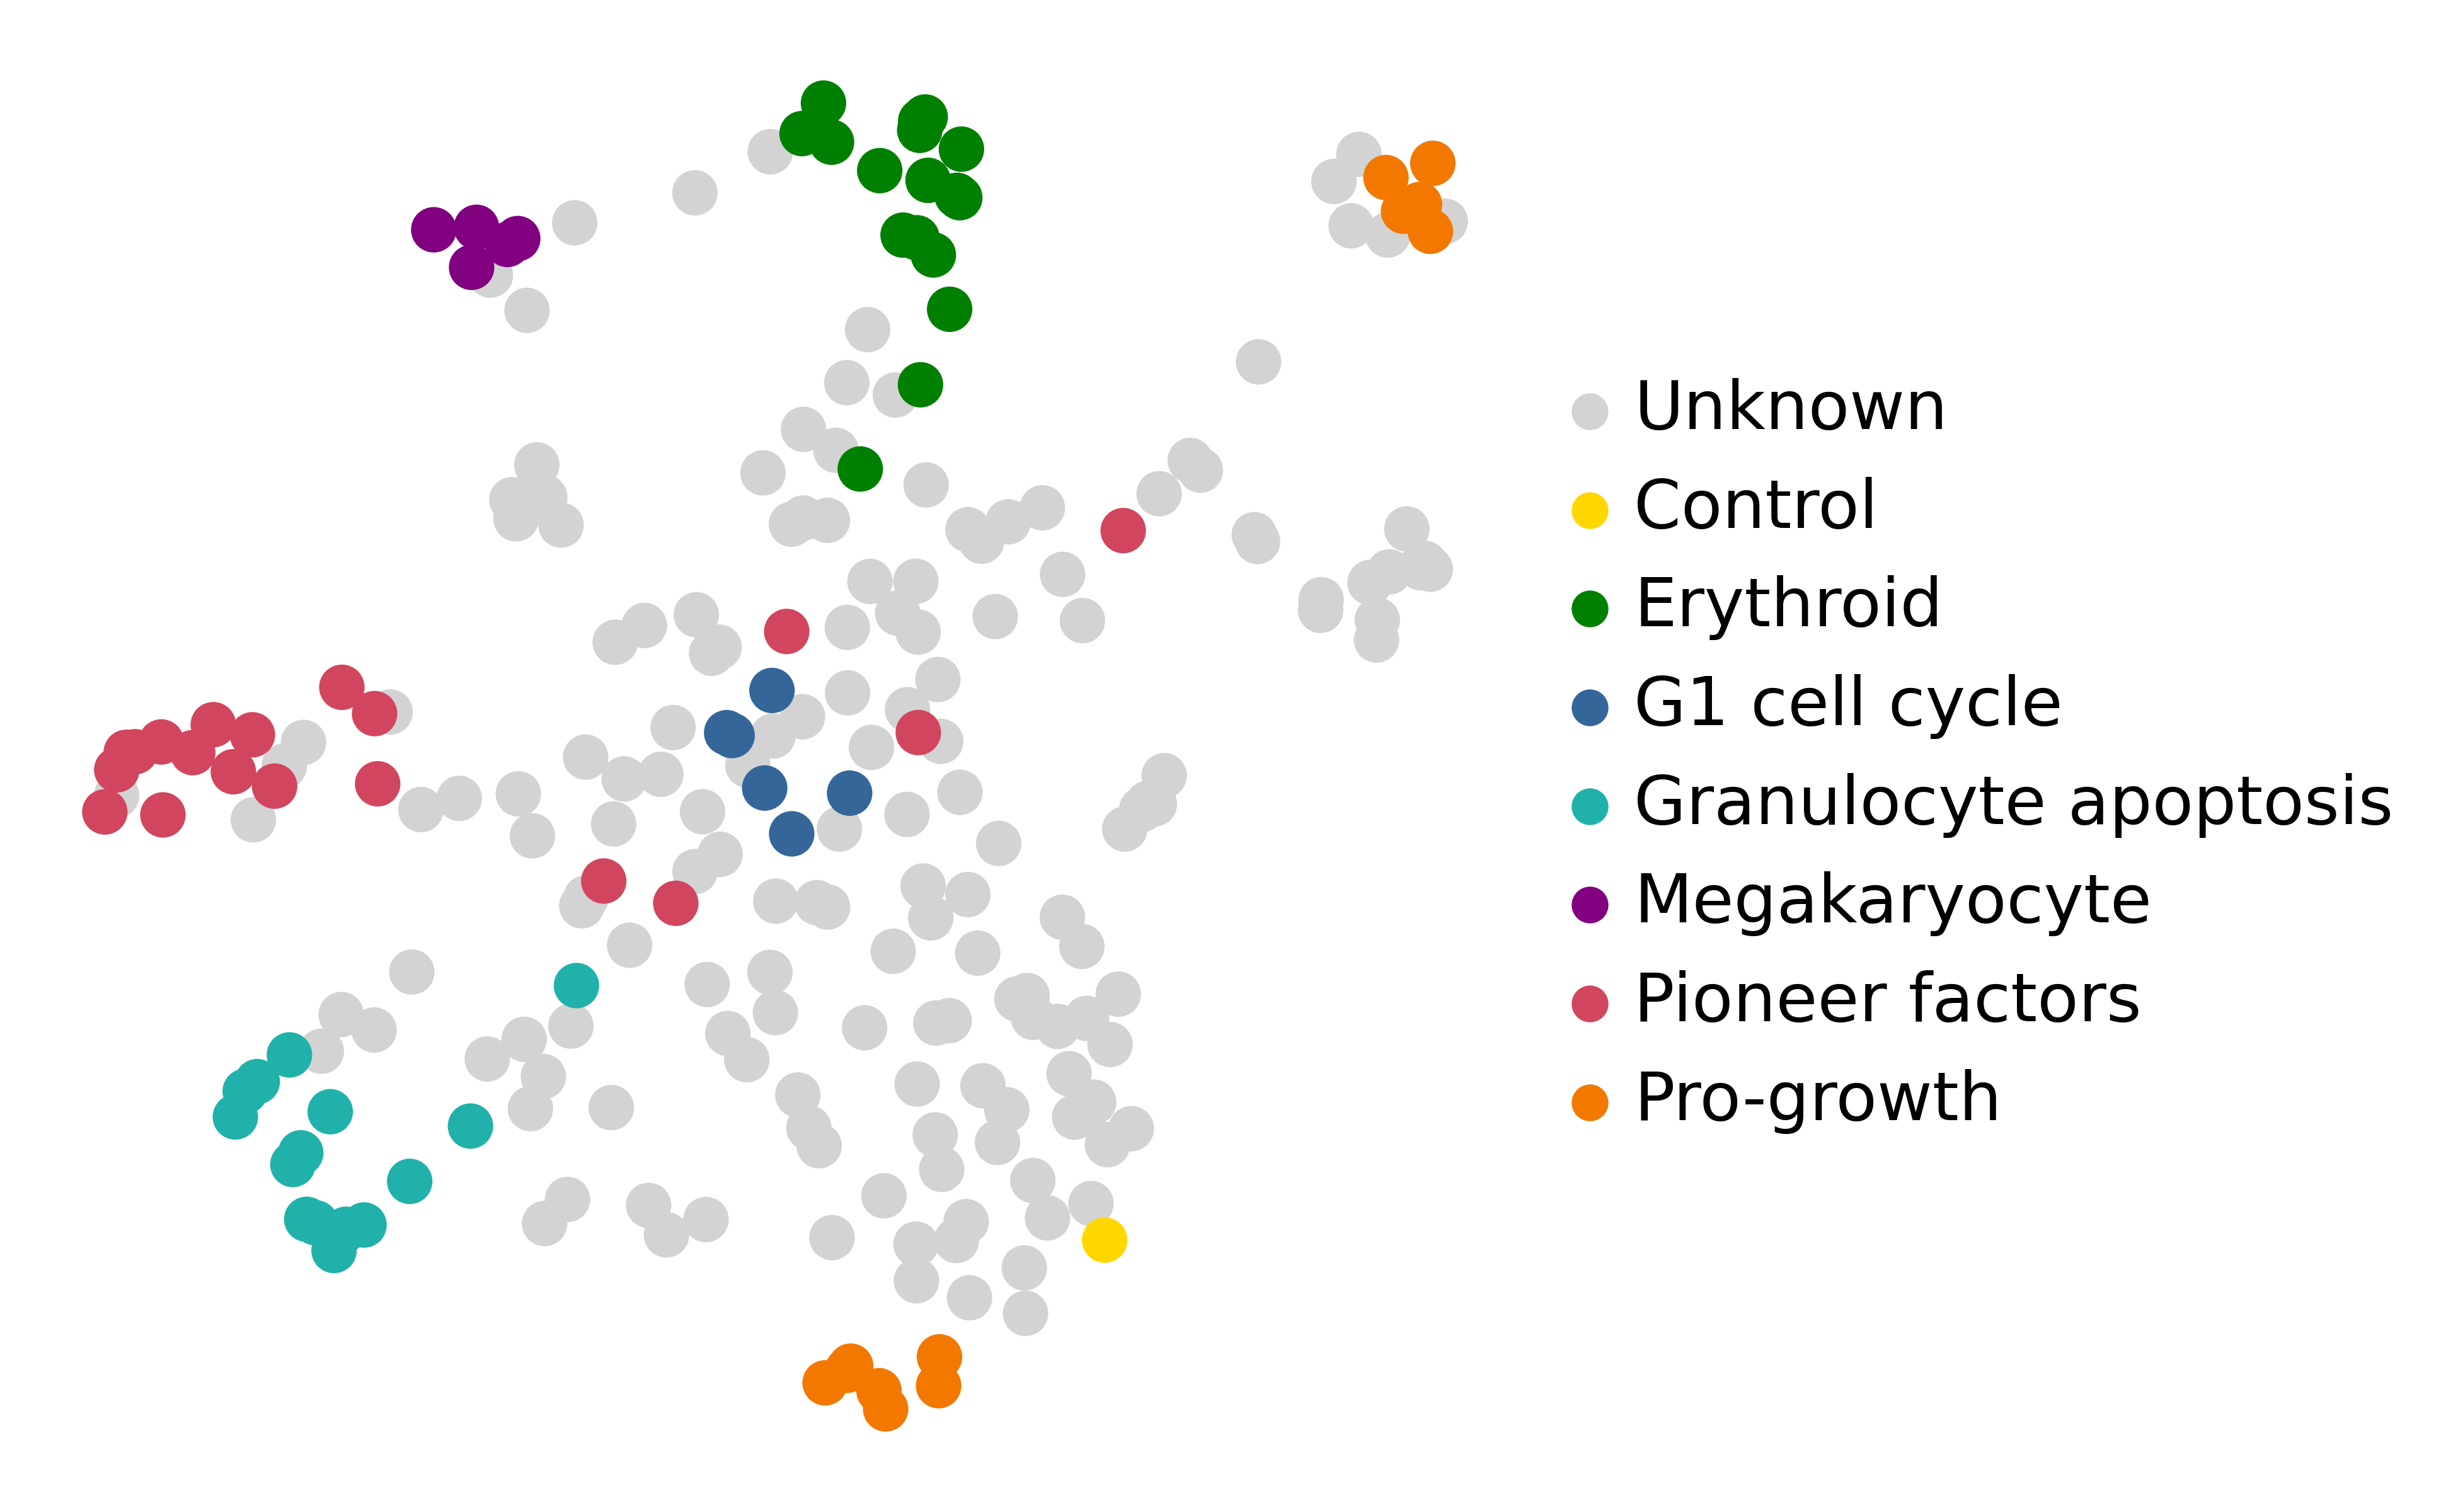

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.umap(psadata_classifier[psadata_classifier.obs["gene_programme"] == "Unknown"], 
           color="gene_programme", 
           show=False, 
           size=300, 
           ax=ax, 
           title = "",
           palette=common_config.norman_gene_program_color_map)

sc.pl.umap(psadata_classifier[psadata_classifier.obs["gene_programme"] != "Unknown"], 
           color="gene_programme", 
           show=False, 
           size=300, 
           ax=ax, 
           title = "",
           palette=common_config.norman_gene_program_color_map)

plt.savefig("norman/figures/no_mix_discriminator_gene_programme_basic_UMAP.png", bbox_inches="tight")

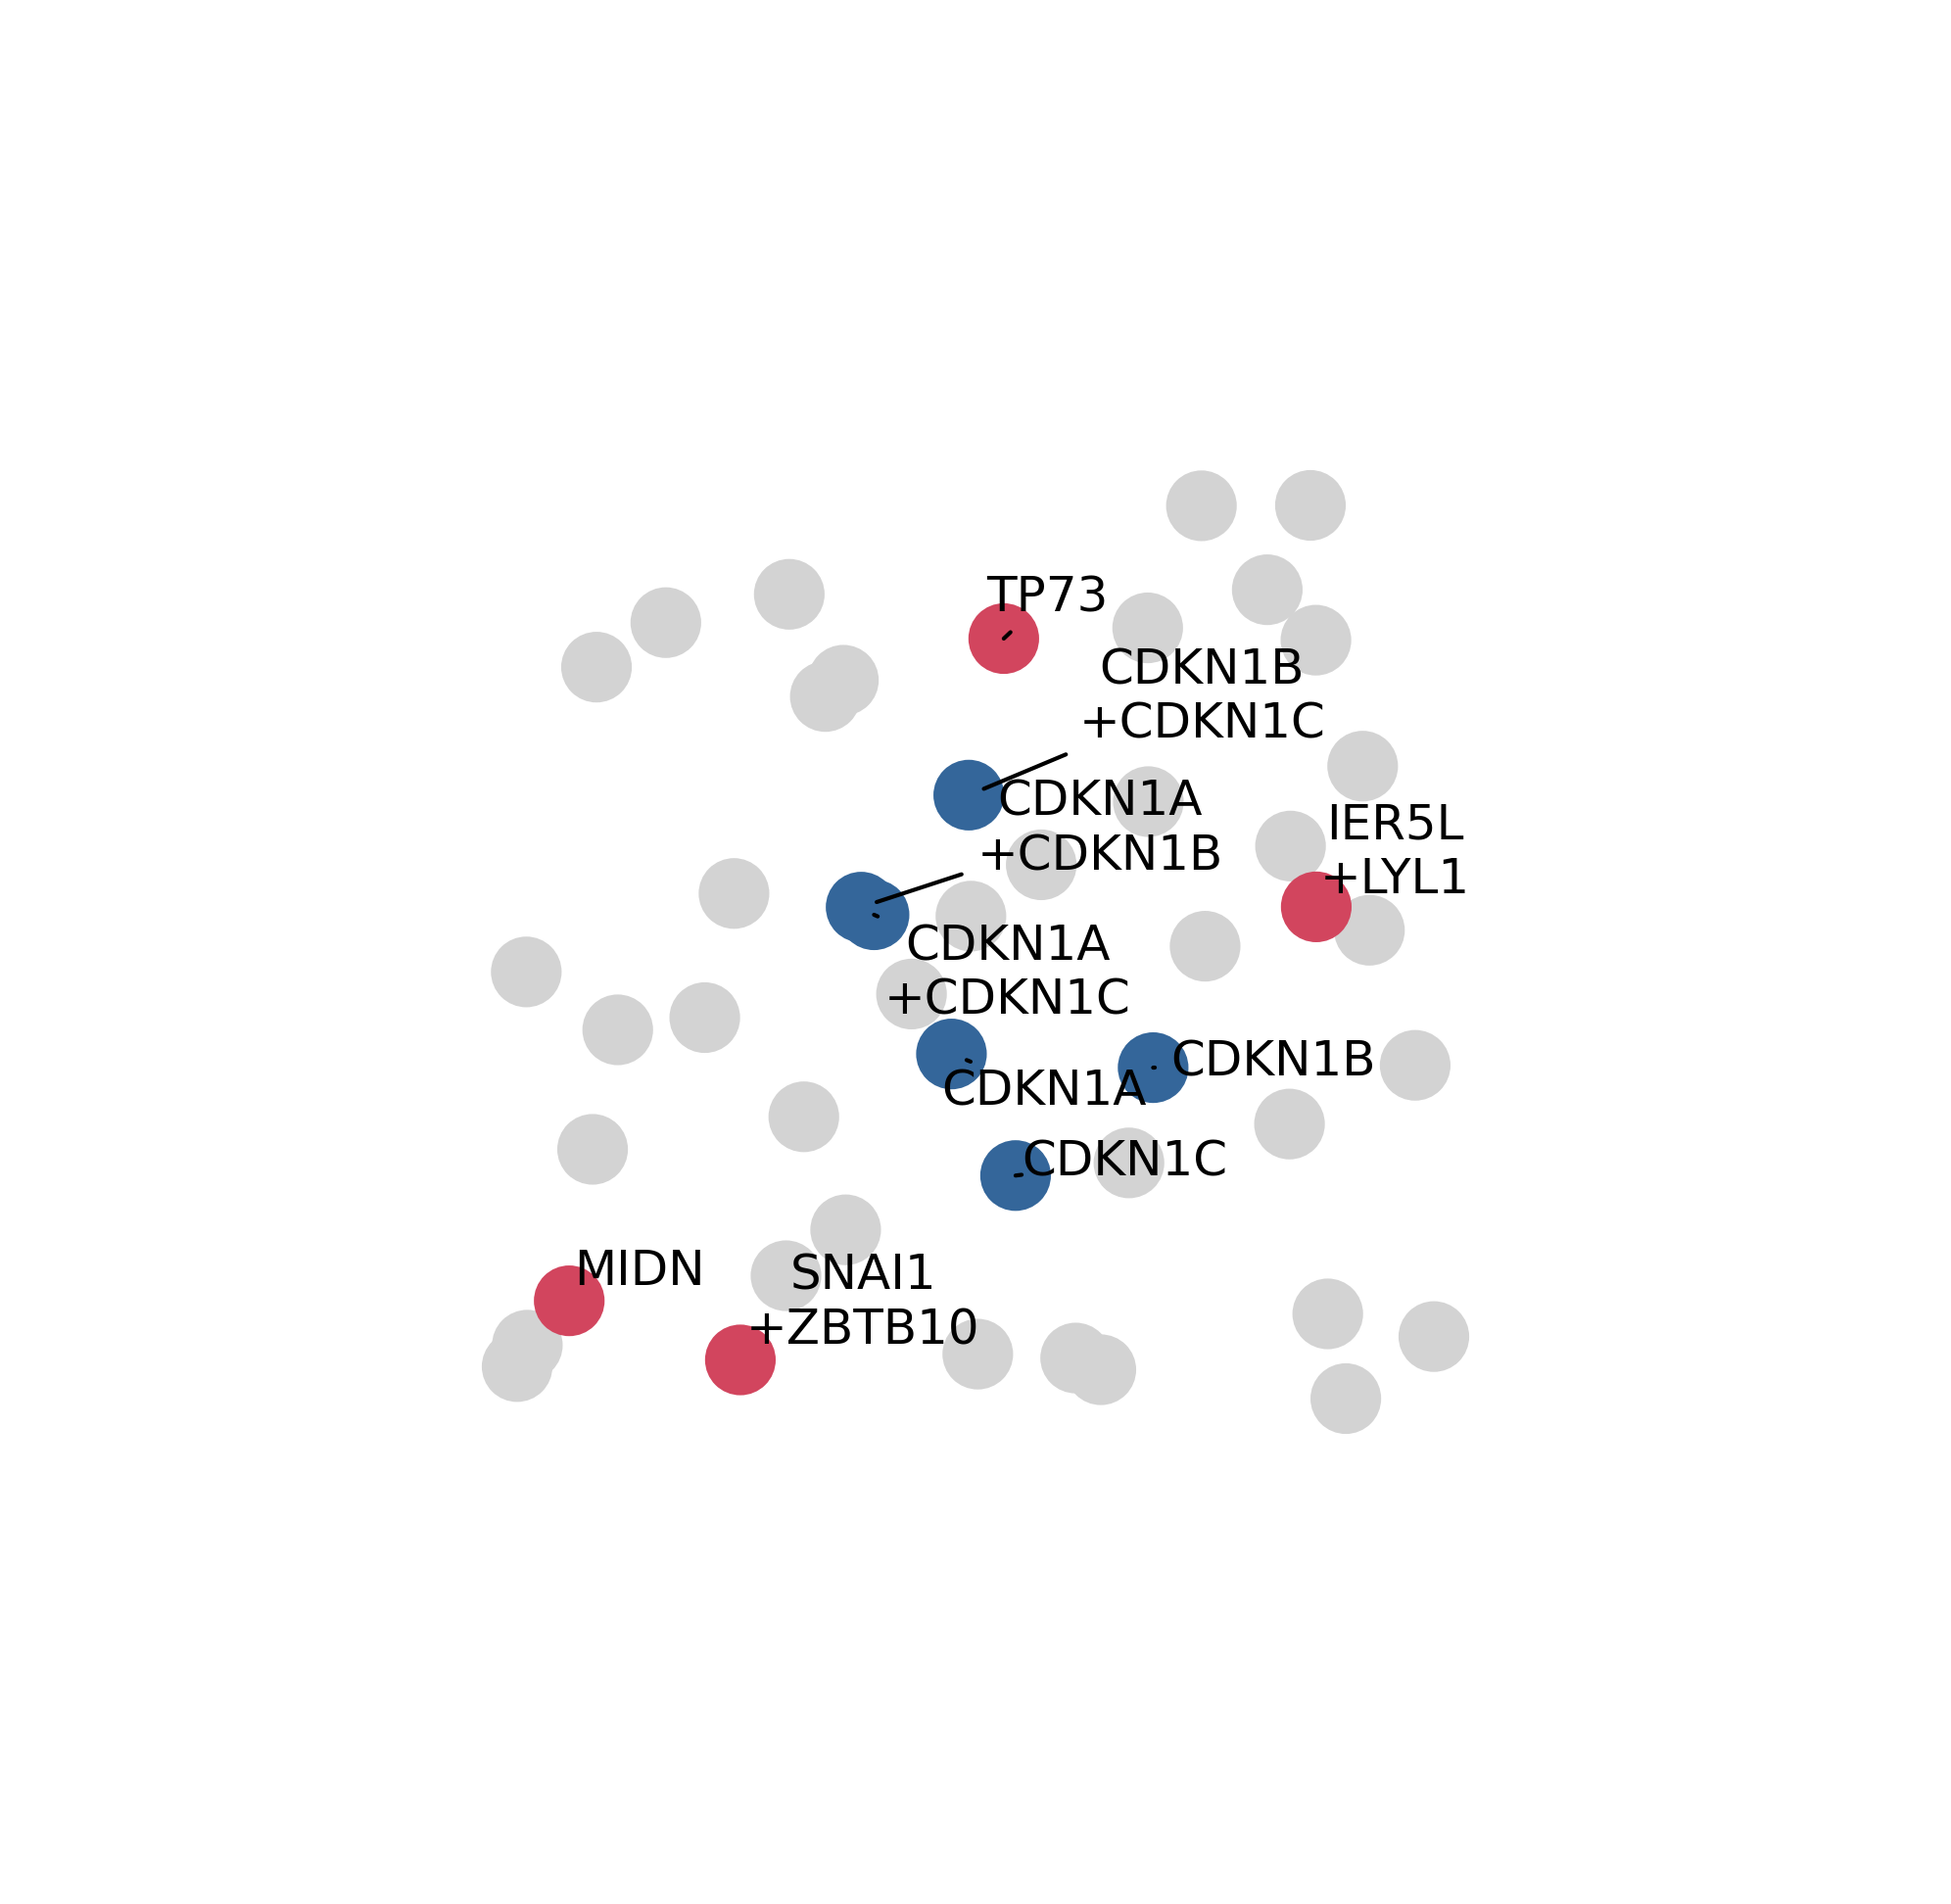

In [11]:
cell_cycle_umap = psadata_classifier[(psadata_classifier.obsm["X_umap"][:, 0] > 3) 
                                  & (psadata_classifier.obsm["X_umap"][:, 0] < 6)
                                  & (psadata_classifier.obsm["X_umap"][:, 1] > -3)
                                  & (psadata_classifier.obsm["X_umap"][:, 1] < -0.25)]

fig, ax = plt.subplots(figsize=(4, 4))
ax.margins(0.5)
sc.pl.umap(cell_cycle_umap[cell_cycle_umap.obs["gene_programme"] == "Unknown"], 
           color="gene_programme", 
           show=False, 
           size=300, 
           ax=ax, 
           title = "",
           palette=common_config.norman_gene_program_color_map)

annotated = cell_cycle_umap[cell_cycle_umap.obs["gene_programme"] != "Unknown"]
sc.pl.umap(annotated, 
           color="gene_programme", 
           show=False,
           size=300, 
           ax=ax, 
           title = "",
           palette=common_config.norman_gene_program_color_map)

texts = [ax.text(x, y, pert.replace('+','\n+'), fontsize=6) for x, y, pert in zip(annotated.obsm["X_umap"][:, 0], annotated.obsm["X_umap"][:, 1], annotated.obs["perturbation_name"])]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

ax.get_legend().remove()
plt.savefig("norman/figures/discriminator_cell_cycle_UMAP.svg", bbox_inches="tight", format="svg")

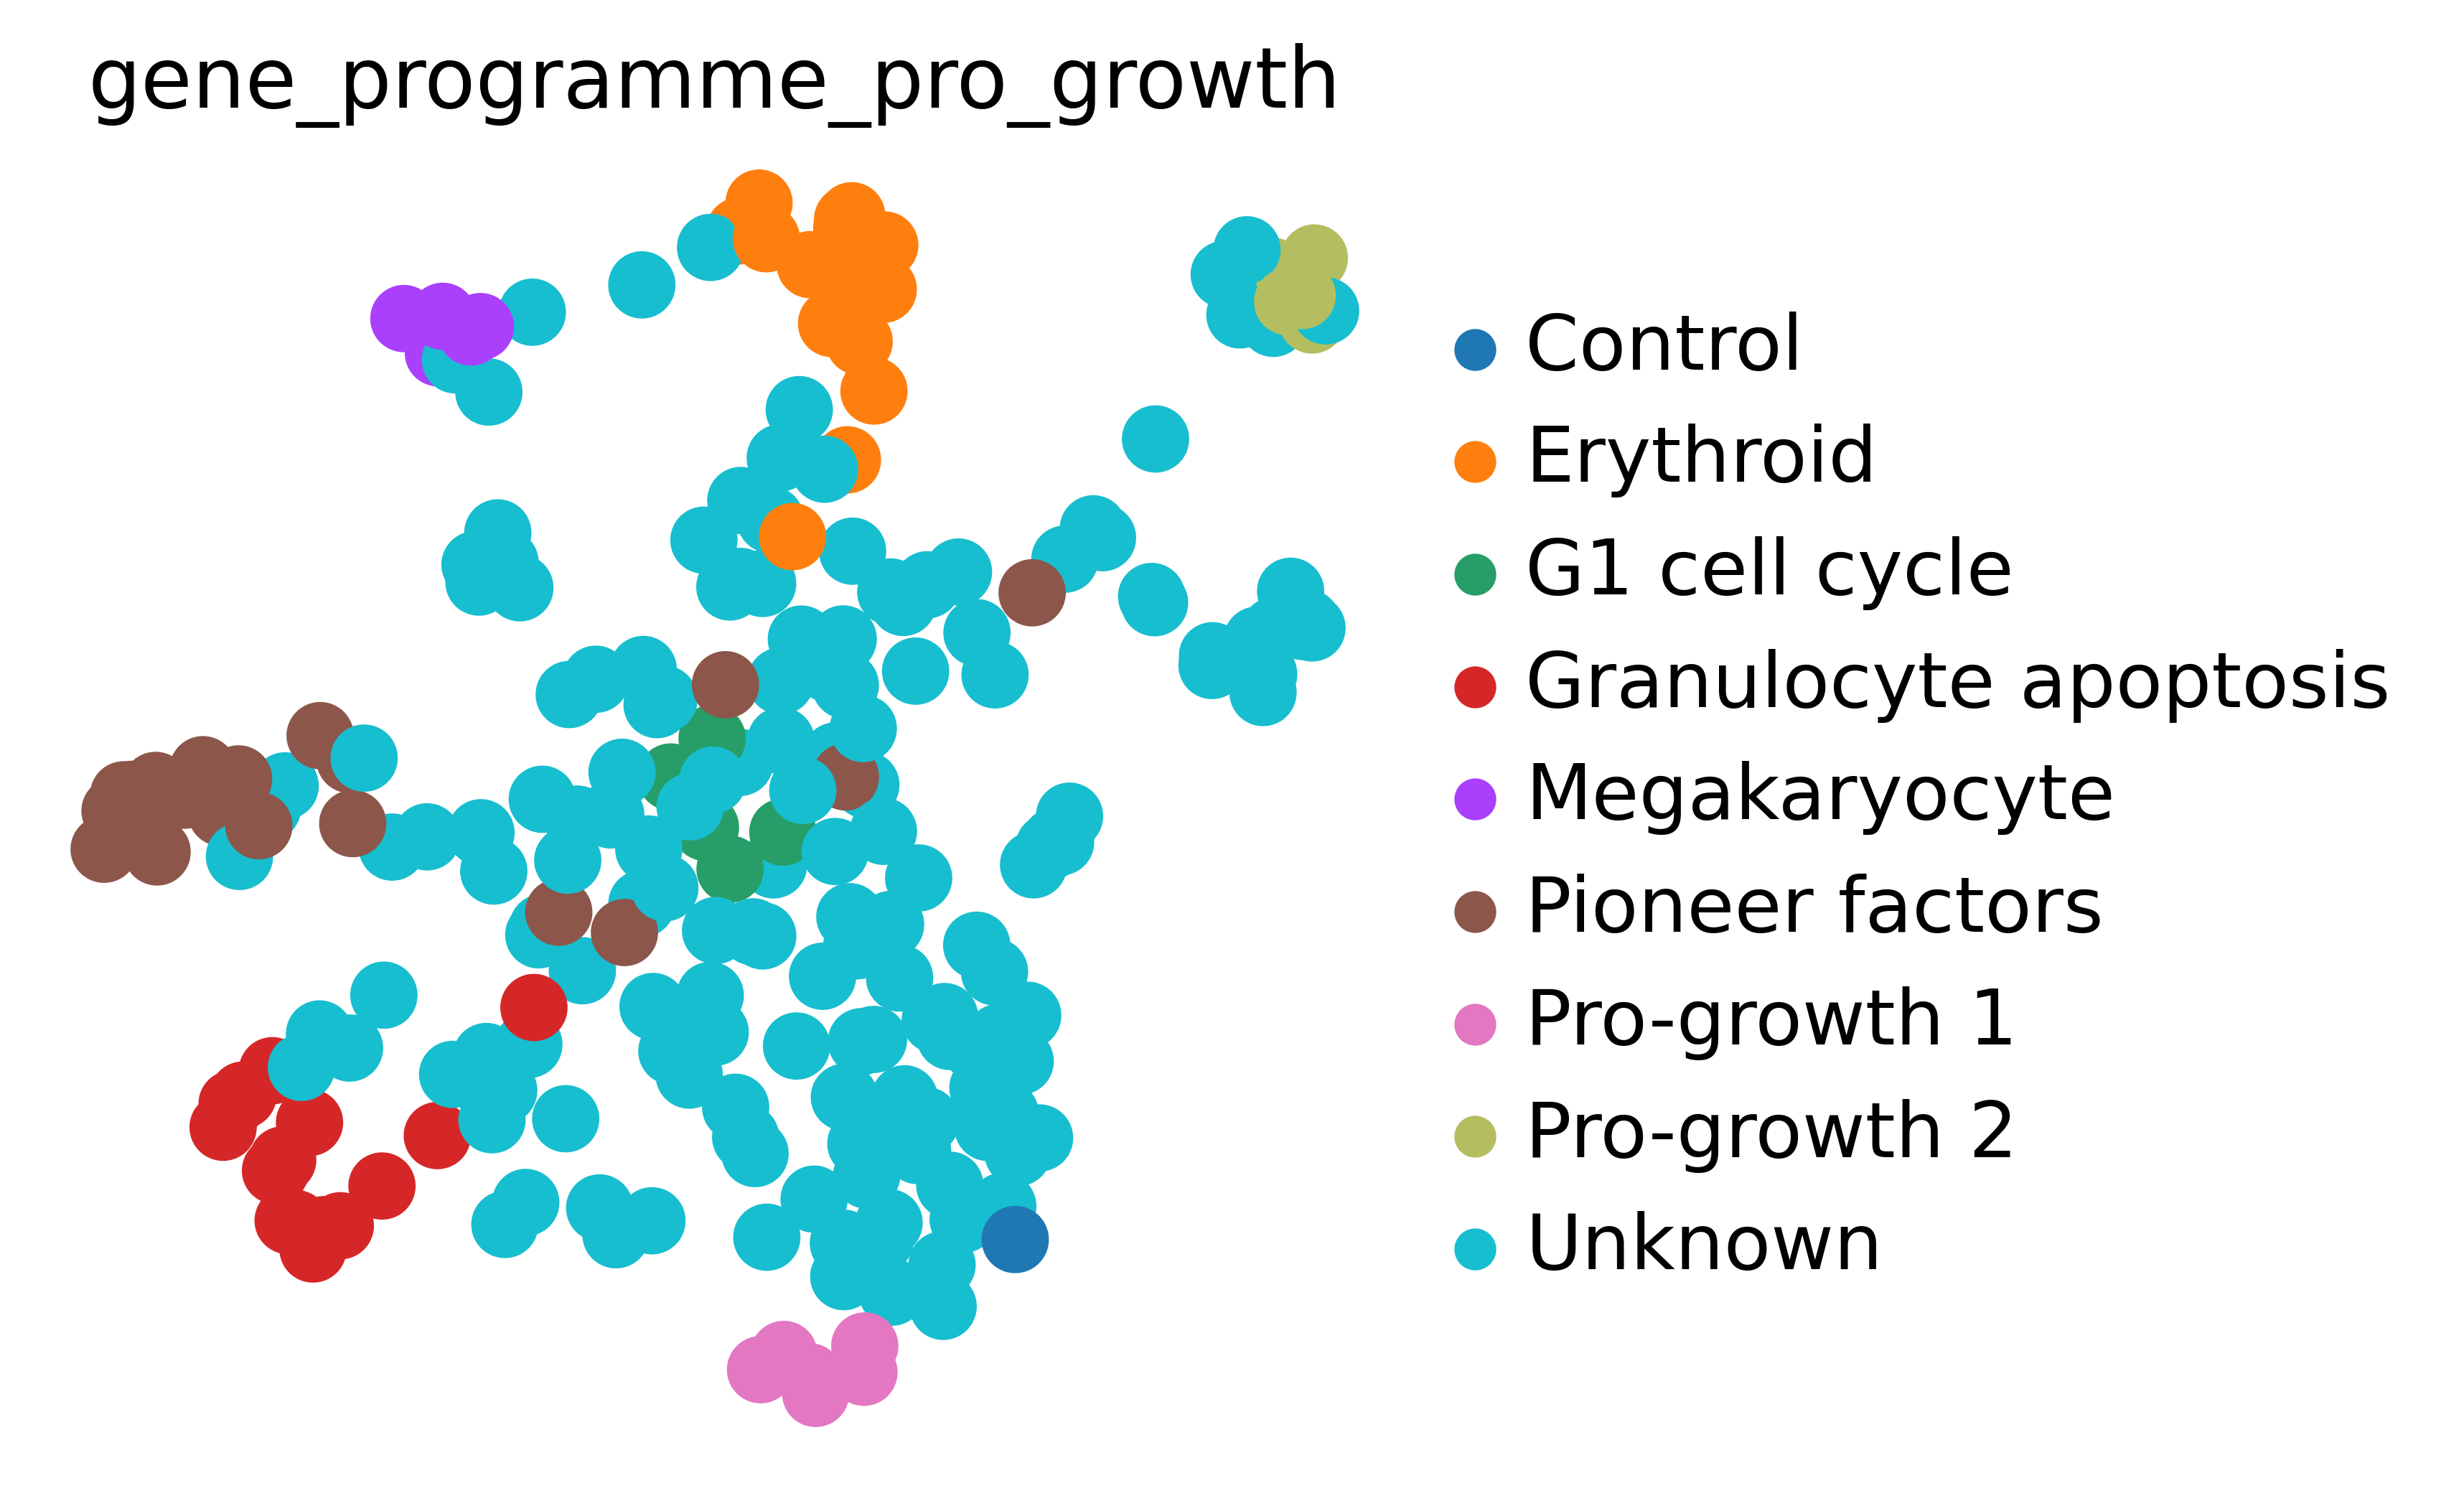

Output()

gene_programme_pro_growth   Unknown  Pro-growth 2  Erythroid  G1 cell cycle  \
gene_programme_pro_growth                                                     
Unknown                    0.000000      0.383601   0.094414       0.011043   
Pro-growth 2               0.383601      0.000000   0.550397       0.416938   
Erythroid                  0.094414      0.550397   0.000000       0.087987   
G1 cell cycle              0.011043      0.416938   0.087987       0.000000   
Granulocyte apoptosis      0.188577      0.484296   0.321512       0.213128   
Megakaryocyte              0.266493      0.690884   0.397779       0.300433   
Pioneer factors            0.039596      0.486040   0.142720       0.042196   
Pro-growth 1               0.122314      0.455895   0.243739       0.114359   
Control                    0.043476      0.449762   0.163348       0.039476   

gene_programme_pro_growth  Granulocyte apoptosis  Megakaryocyte  \
gene_programme_pro_growth                                         
Unknown                                 0.188577       0.266493   
Pro-growth 2                            0.484296       0.690884   
Erythroid                               0.321512       0.397779   
G1 cell cycle                           0.213128       0.300433   
Granulocyte apoptosis                   0.000000       0.346807   
Megakaryocyte                           0.346807       0.000000   
Pioneer factors                         0.244945       0.328222   
Pro-growth 1                            0.322775       0.424150   
Control                                 0.250915       0.337827   

gene_programme_pro_growth  Pioneer factors  Pro-growth 1   Control  
gene_programme_pro_growth                                           
Unknown                           0.039596      0.122314  0.043476  
Pro-growth 2                      0.486040      0.455895  0.449762  
Erythroid                         0.142720      0.243739  0.163348  
G1 cell cycle                     0.042196      0.114359  0.039476  
Granulocyte apoptosis             0.244945      0.322775  0.250915  
Megakaryocyte                     0.328222      0.424150  0.337827  
Pioneer factors                   0.000000      0.182800  0.092858  
Pro-growth 1                      0.182800      0.000000  0.124295  
Control                           0.092858      0.124295  0.000000

In [13]:
umap_y_coords = psadata_classifier.obsm["X_umap"][:, 1]
gene_programmes = psadata_classifier.obs["gene_programme"]

pro_growth_labels = []
for i, y_coord in enumerate(umap_y_coords):
    if gene_programmes[i] != "Pro-growth":
        pro_growth_labels.append(gene_programmes[i])
    elif y_coord < -3:
        pro_growth_labels.append("Pro-growth 1")
    else:
        pro_growth_labels.append("Pro-growth 2")
        
psadata_classifier.obs["gene_programme_pro_growth"] = pro_growth_labels
sc.pl.umap(psadata_classifier, color="gene_programme_pro_growth")

# Compute distance based on MLPClassifier embeddings
psadata_classifier.layers["X"] = psadata_classifier.X

# Pairwise MSE Distance between all gene programmes
Distance = pt.tools.Distance(metric="mse", layer_key="X")
pairwise_df = Distance.pairwise(psadata_classifier, groupby="gene_programme_pro_growth")
pairwise_df.to_csv("norman/output/pairwise_mse_distances.csv")
pairwise_df

In [14]:
# Calculate mean pairwise distance
pairwise_df = pairwise_df.drop("Unknown")
pairwise_df = pairwise_df.drop("Unknown", axis=1)

# Get the lower triangle of the matrix (excluding diagonal)
mask = np.tril(np.ones_like(pairwise_df, dtype=bool), k=-1)
lower_triangle = pairwise_df.values[mask]

mean_distance = np.mean(lower_triangle)
mean_distance

0.2948743523911516

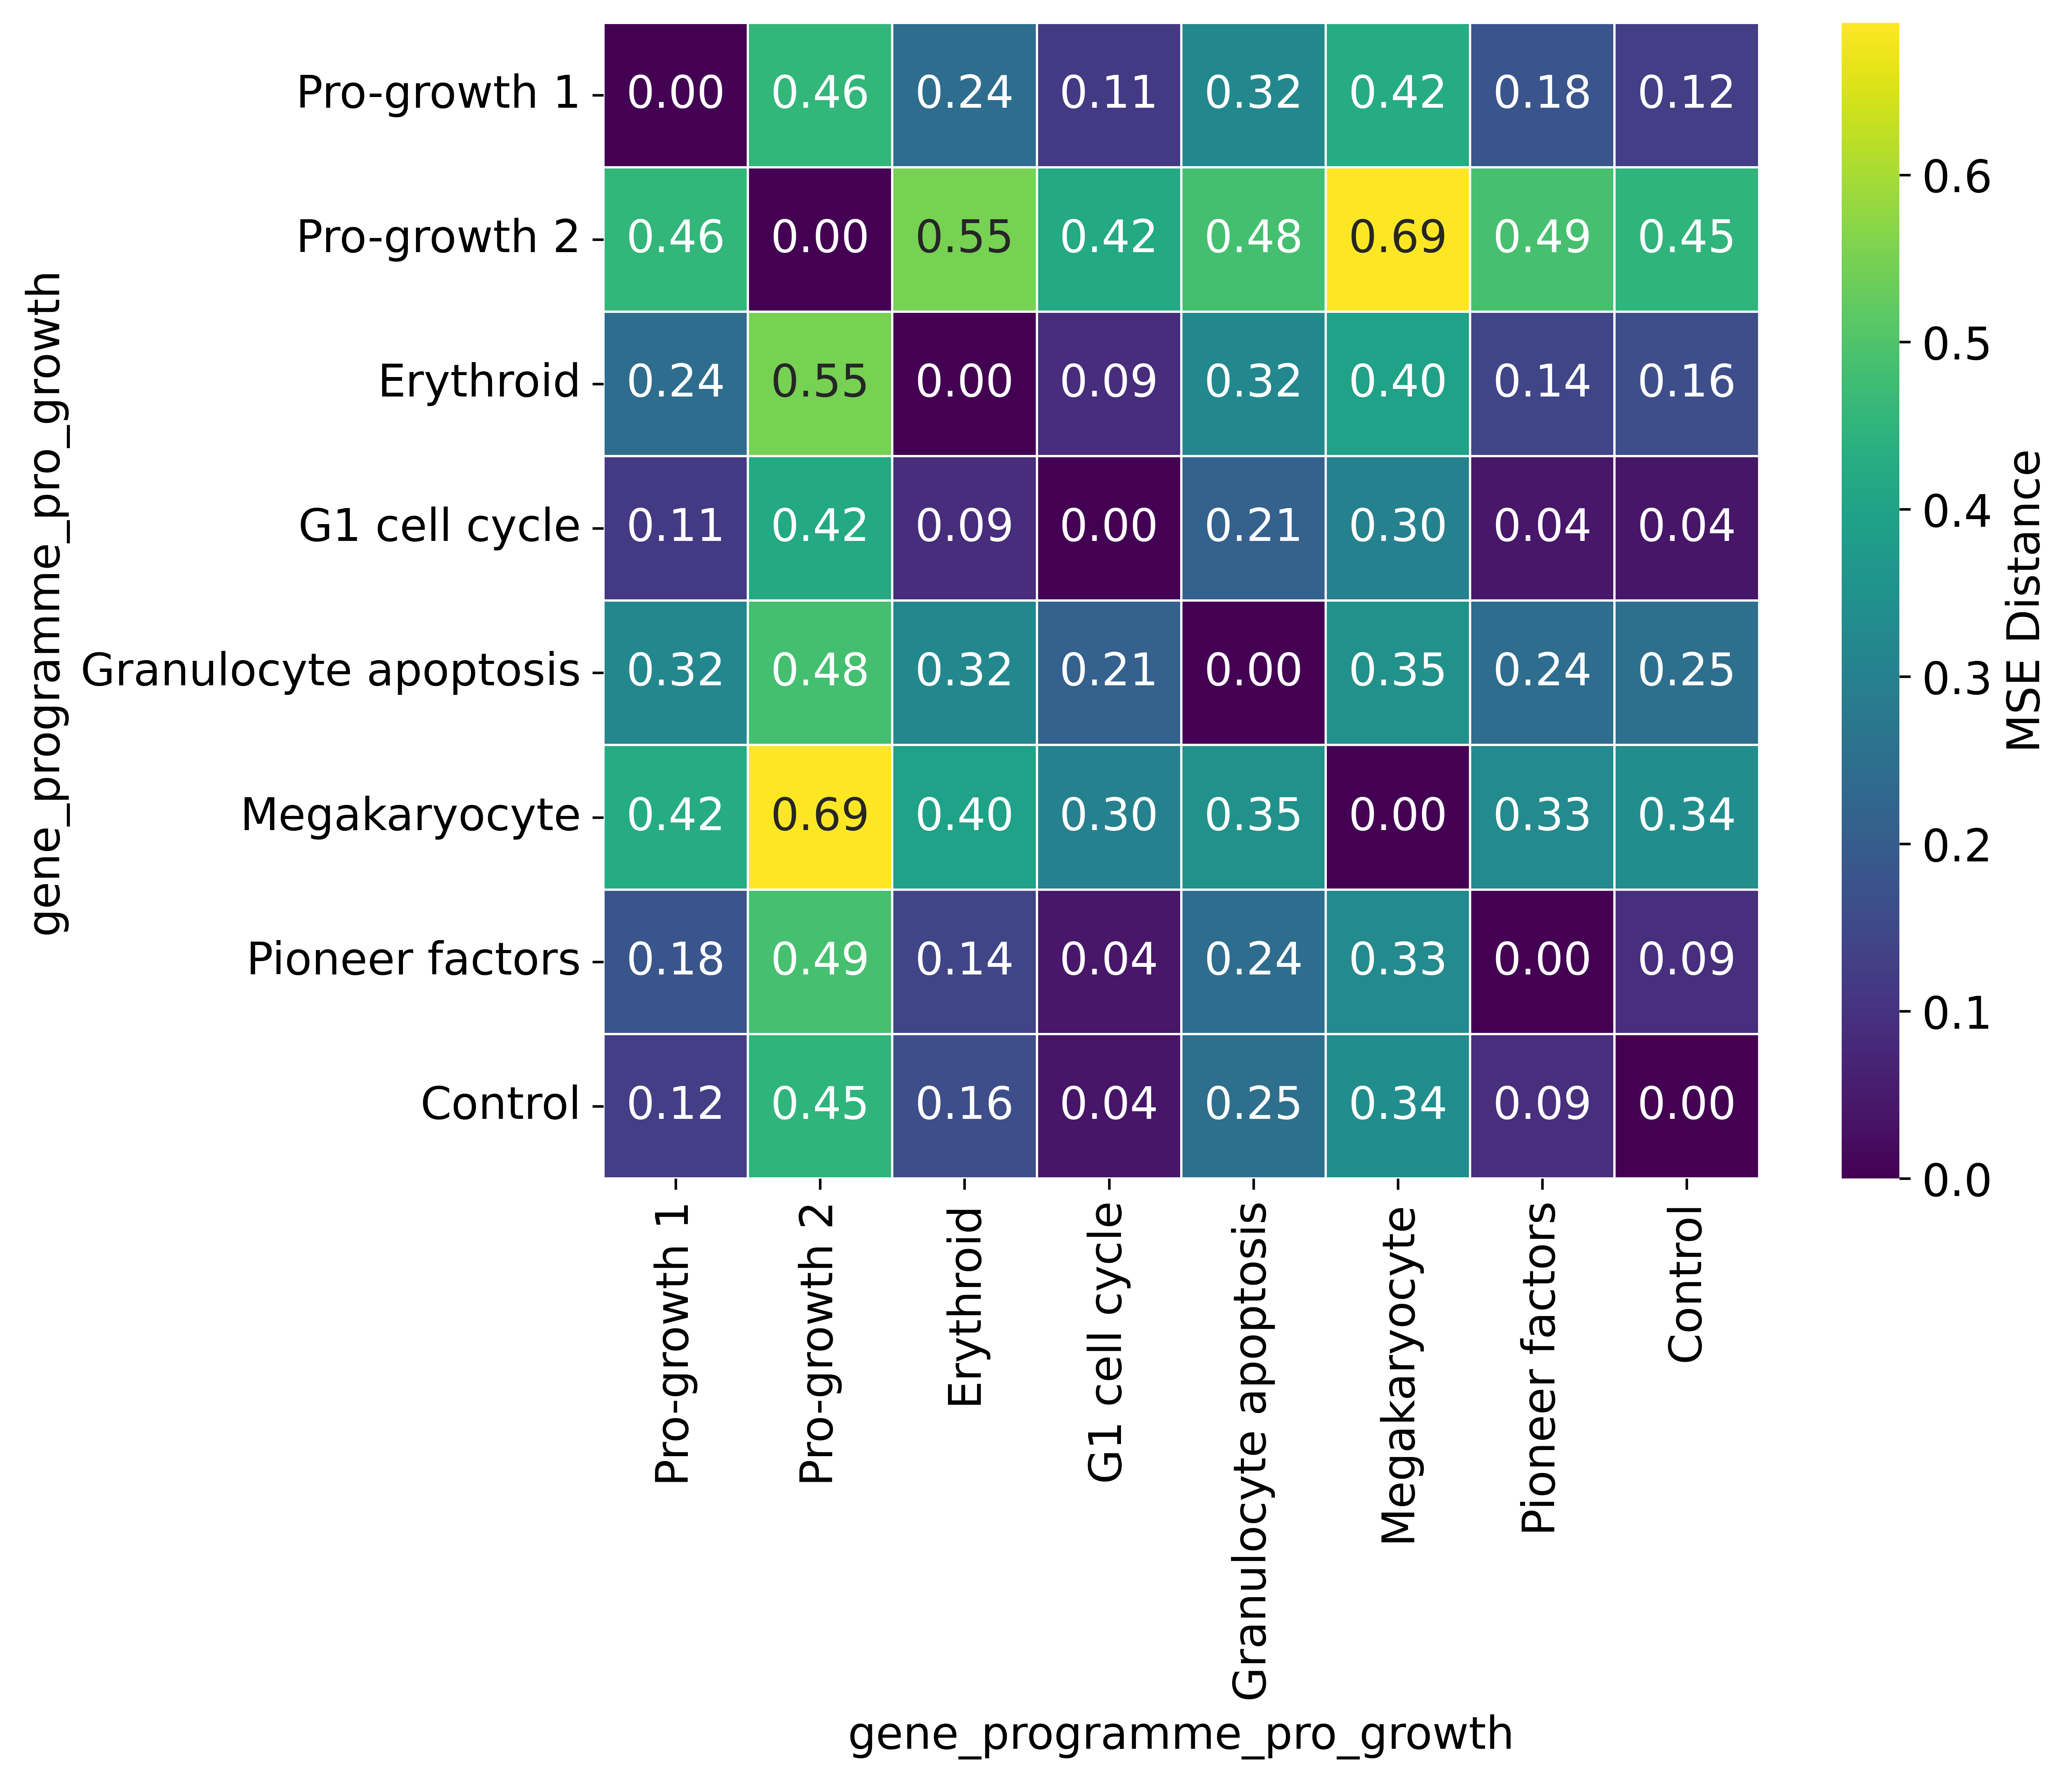

In [15]:
# Unknown group is excluded on purpose
fig, ax = plt.subplots(figsize=(10, 8))

order = ['Pro-growth 1', 'Pro-growth 2'] + [col for col in pairwise_df.columns if col not in ['Pro-growth 1', 'Pro-growth 2']]
pairwise_df = pairwise_df.reindex(order)
pairwise_df = pairwise_df.reindex(columns=order)

sns.heatmap(pairwise_df, 
            #mask=mask,
            cmap="viridis",
            annot=np.round(pairwise_df, 3), 
            fmt='.2f',                       
            square=True,                   
            linewidths=.5,
            ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('MSE Distance')

ax.grid(False)
plt.tight_layout()
plt.savefig("norman/figures/gene_programme_distance_heatmap.pdf", bbox_inches="tight", format="pdf")
plt.show()

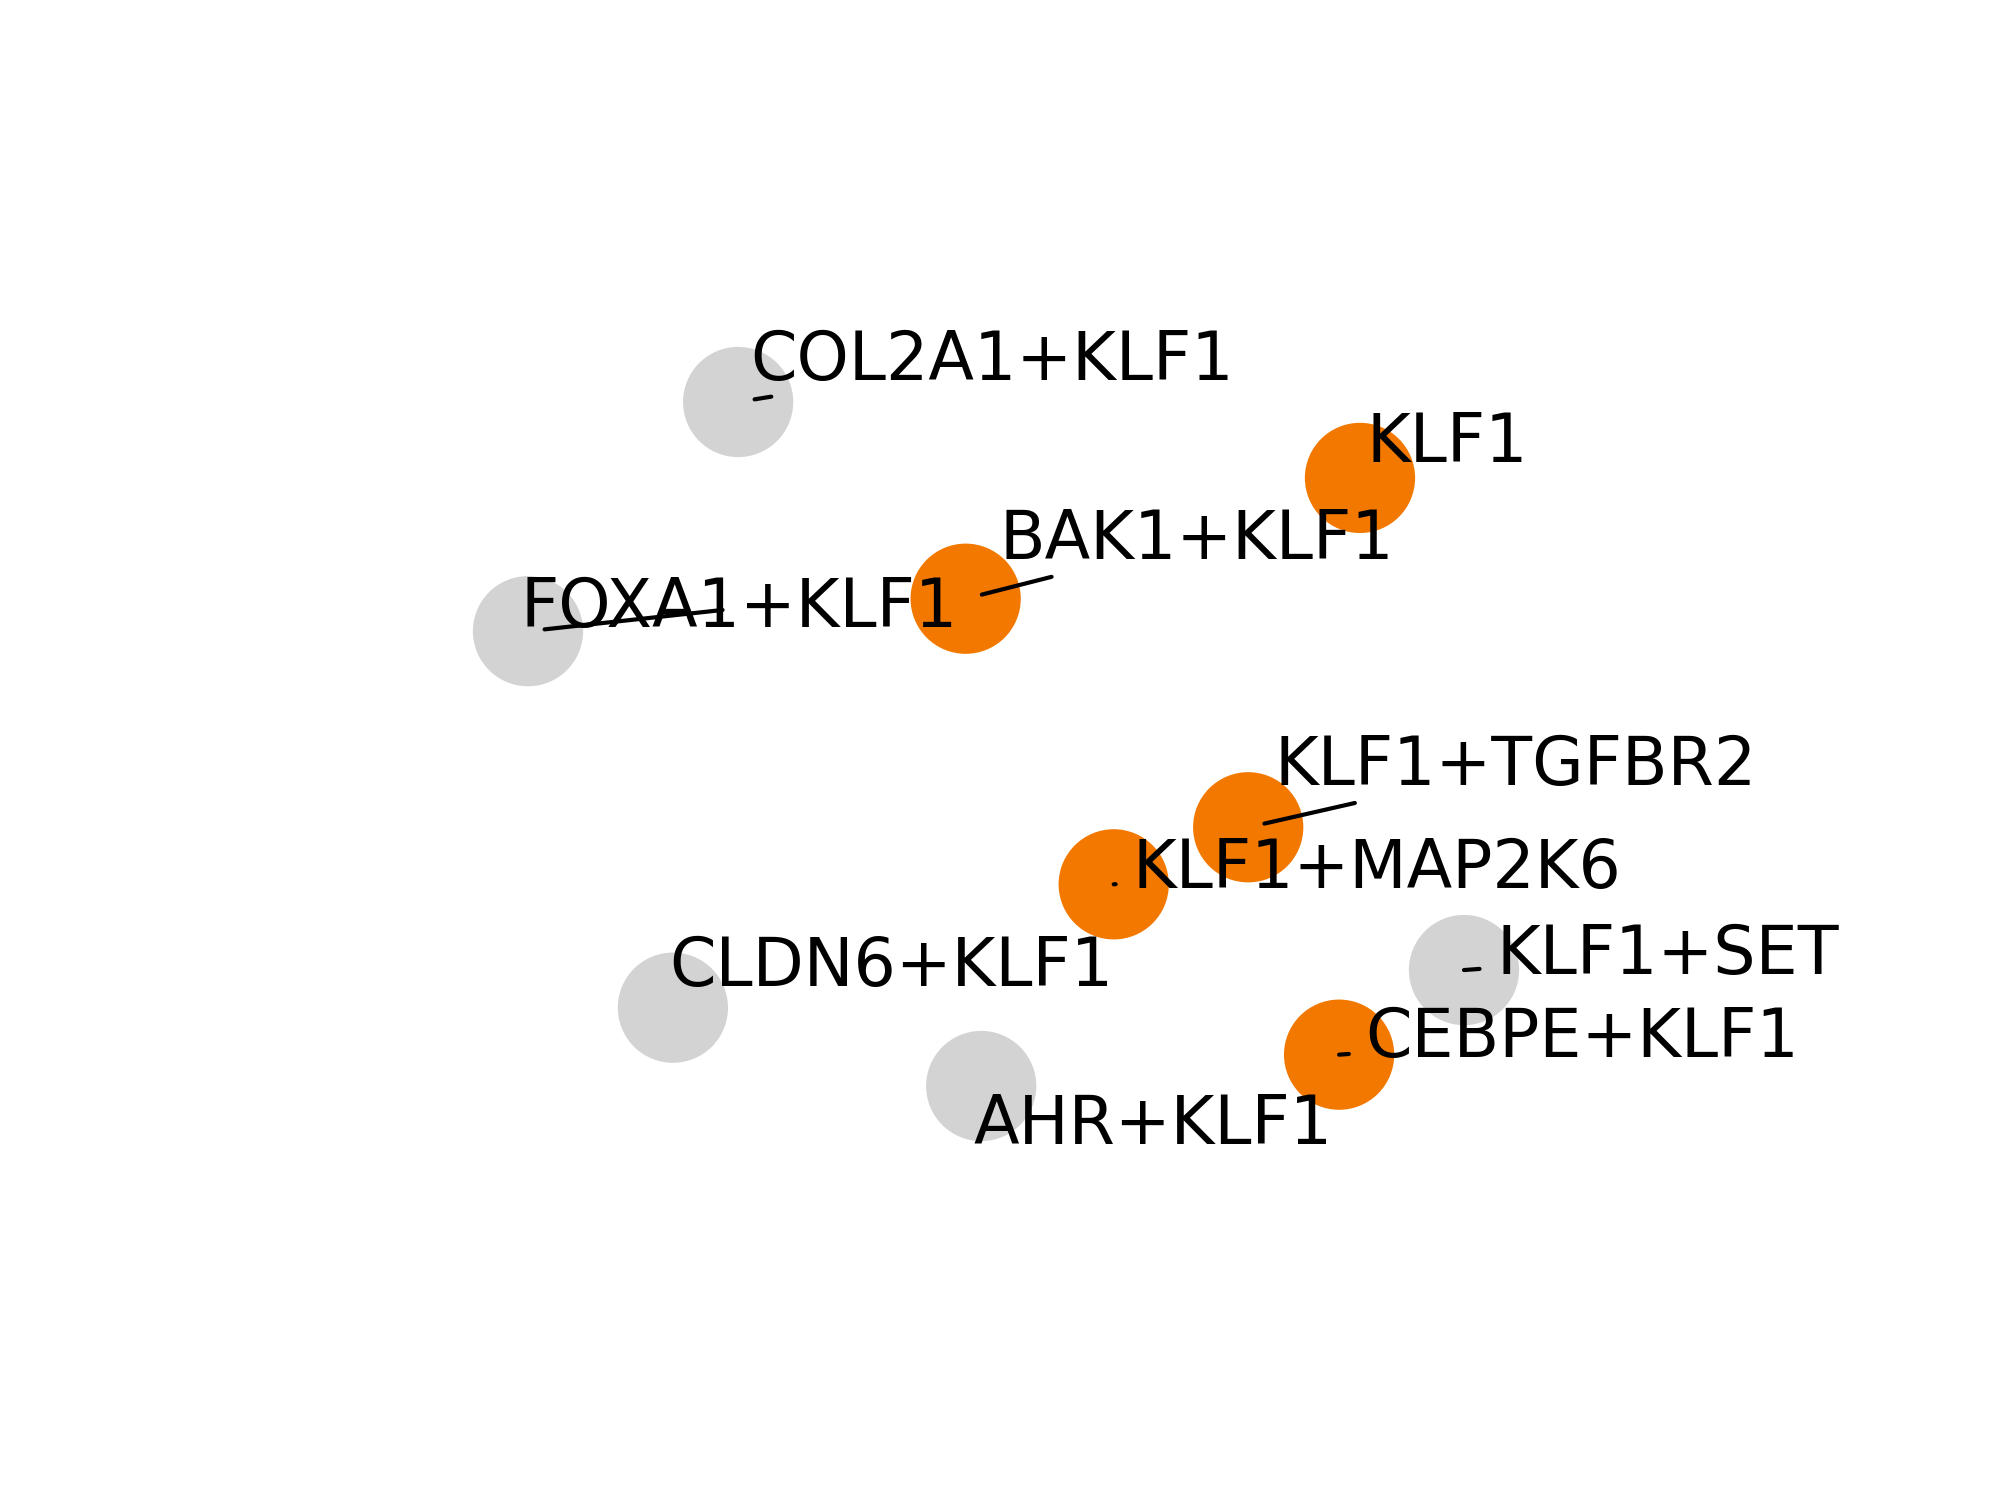

In [13]:
pro_growth1 = psadata_classifier[(psadata_classifier.obsm["X_umap"][:, 1] > 1.5)
                                & (psadata_classifier.obsm["X_umap"][:, 0] > 8)]

fig, ax = plt.subplots(figsize=(4, 3))
ax.margins(0.5)

sc.pl.umap(pro_growth1, 
           color="gene_programme", 
           show=False,
           size=700, 
           ax=ax, 
           title = "",
           palette=common_config.norman_gene_program_color_map
           )

texts = [ax.text(x, y, pert, fontsize=8) for x, y, pert in zip(pro_growth1.obsm["X_umap"][:, 0], pro_growth1.obsm["X_umap"][:, 1], pro_growth1.obs["perturbation_name"])]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

ax.get_legend().remove()
plt.savefig("norman/figures/discriminator_pro_growth1_UMAP.svg", bbox_inches="tight", format="svg")

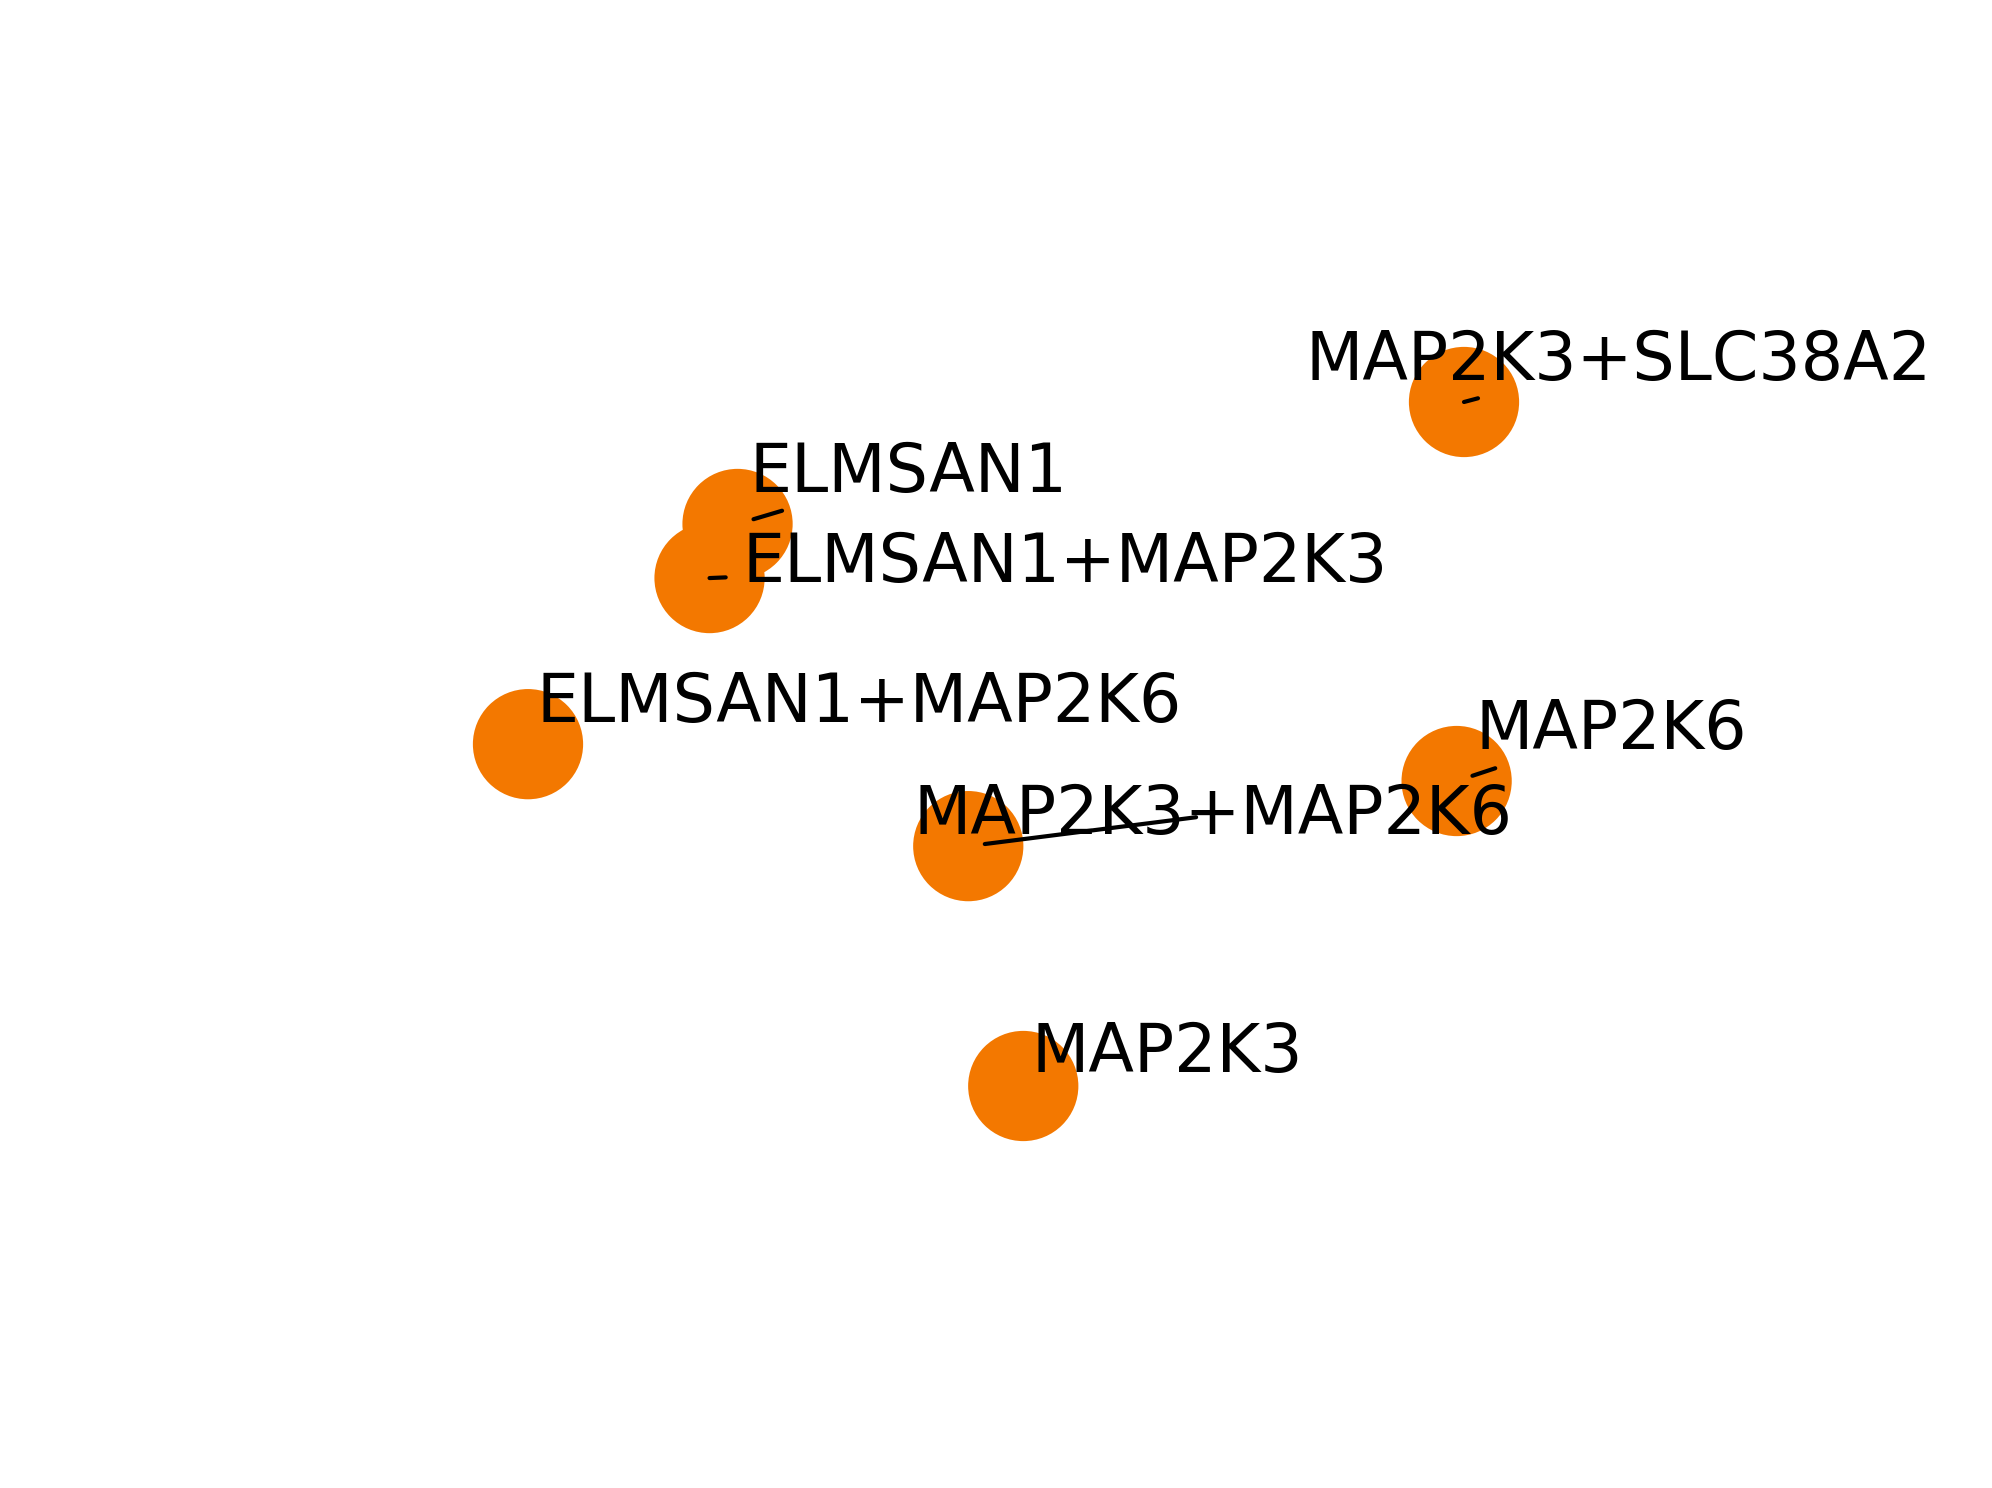

In [13]:
pro_growth2 = psadata_classifier[(psadata_classifier.obsm["X_umap"][:, 1] < -6)
                                & (psadata_classifier.obsm["X_umap"][:, 0] > 1)]
                                #& (psadata_classifier.obs["gene_programme"] == "Pro-growth")]

fig, ax = plt.subplots(figsize=(4, 3))
ax.margins(0.5)

#annotated = pro_growth1[pro_growth1.obs["gene_programme"] != "Unknown"]
sc.pl.umap(pro_growth2, 
           color="gene_programme", 
           show=False,
           size=700, 
           ax=ax, 
           title = "",
           palette=common_config.norman_gene_program_color_map
           )

texts = [ax.text(x, y, pert, fontsize=8) for x, y, pert in zip(pro_growth2.obsm["X_umap"][:, 0], pro_growth2.obsm["X_umap"][:, 1], pro_growth2.obs["perturbation_name"])]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

ax.get_legend().remove()
plt.savefig("norman/figures/discriminator_pro_growth2_UMAP.pdf", bbox_inches="tight", format="pdf")

## Identification and analysis of an unknown cluster

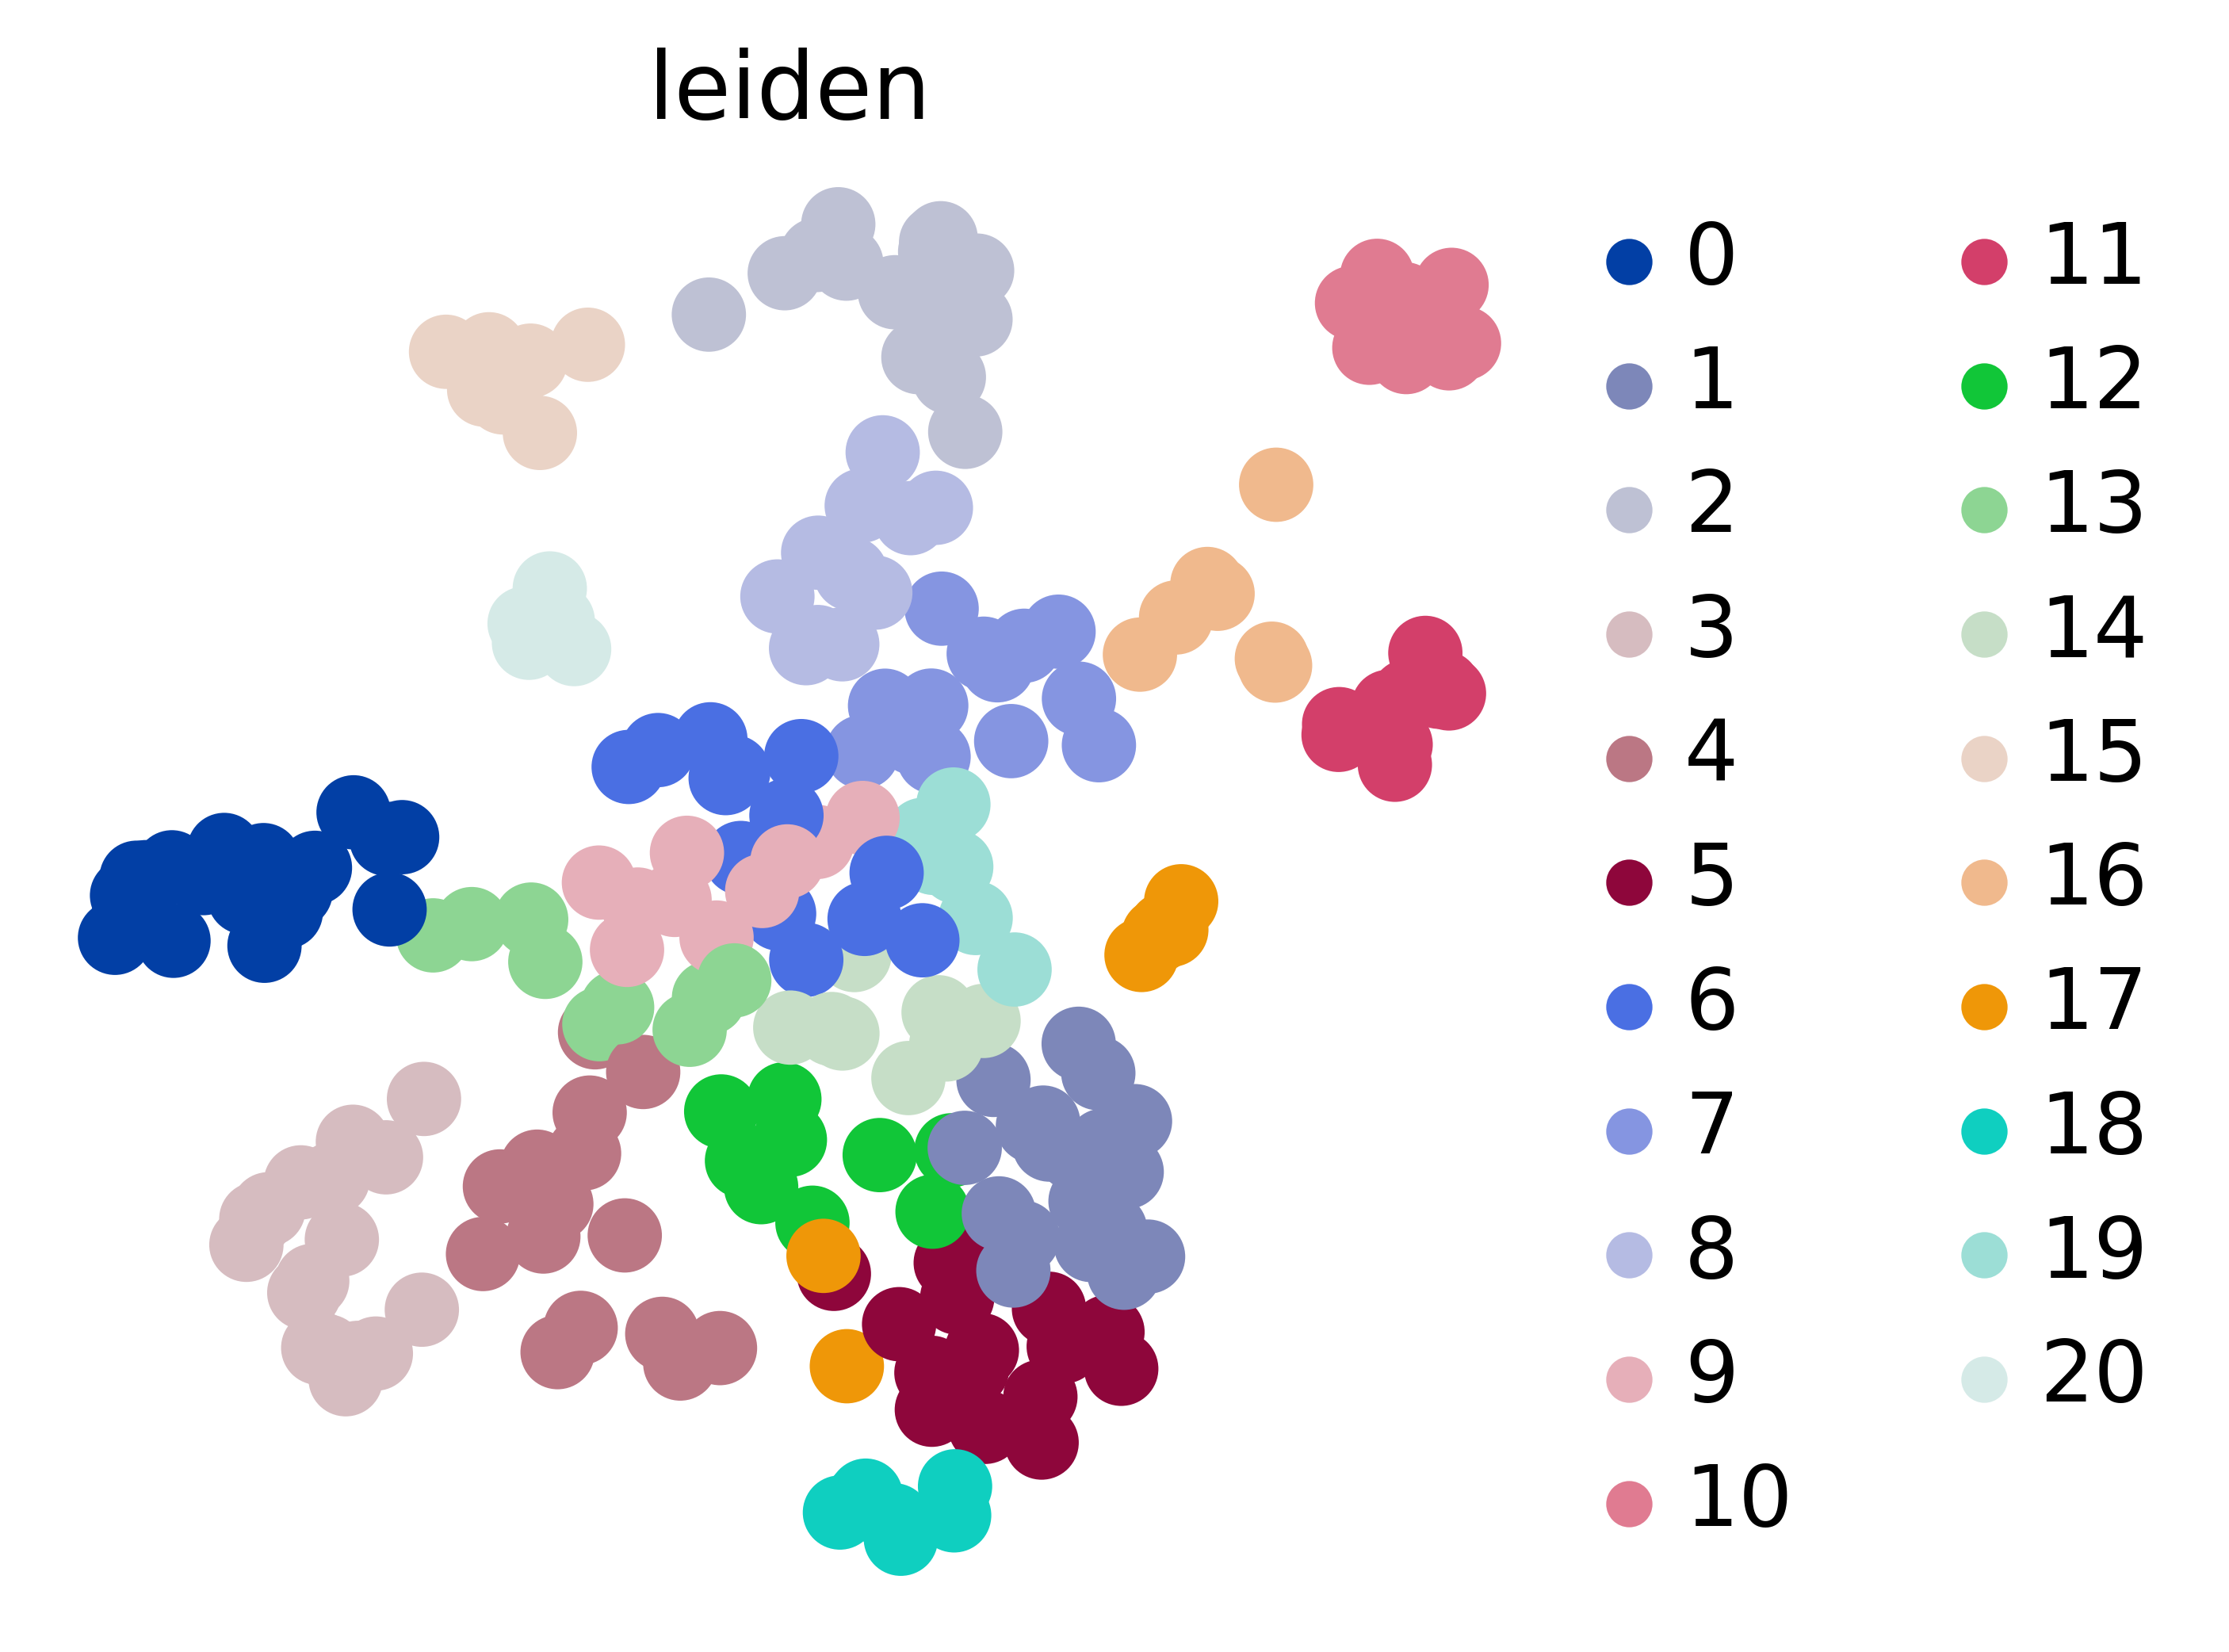

In [14]:
sc.tl.leiden(psadata_classifier, resolution=3)
sc.pl.umap(psadata_classifier, color="leiden")

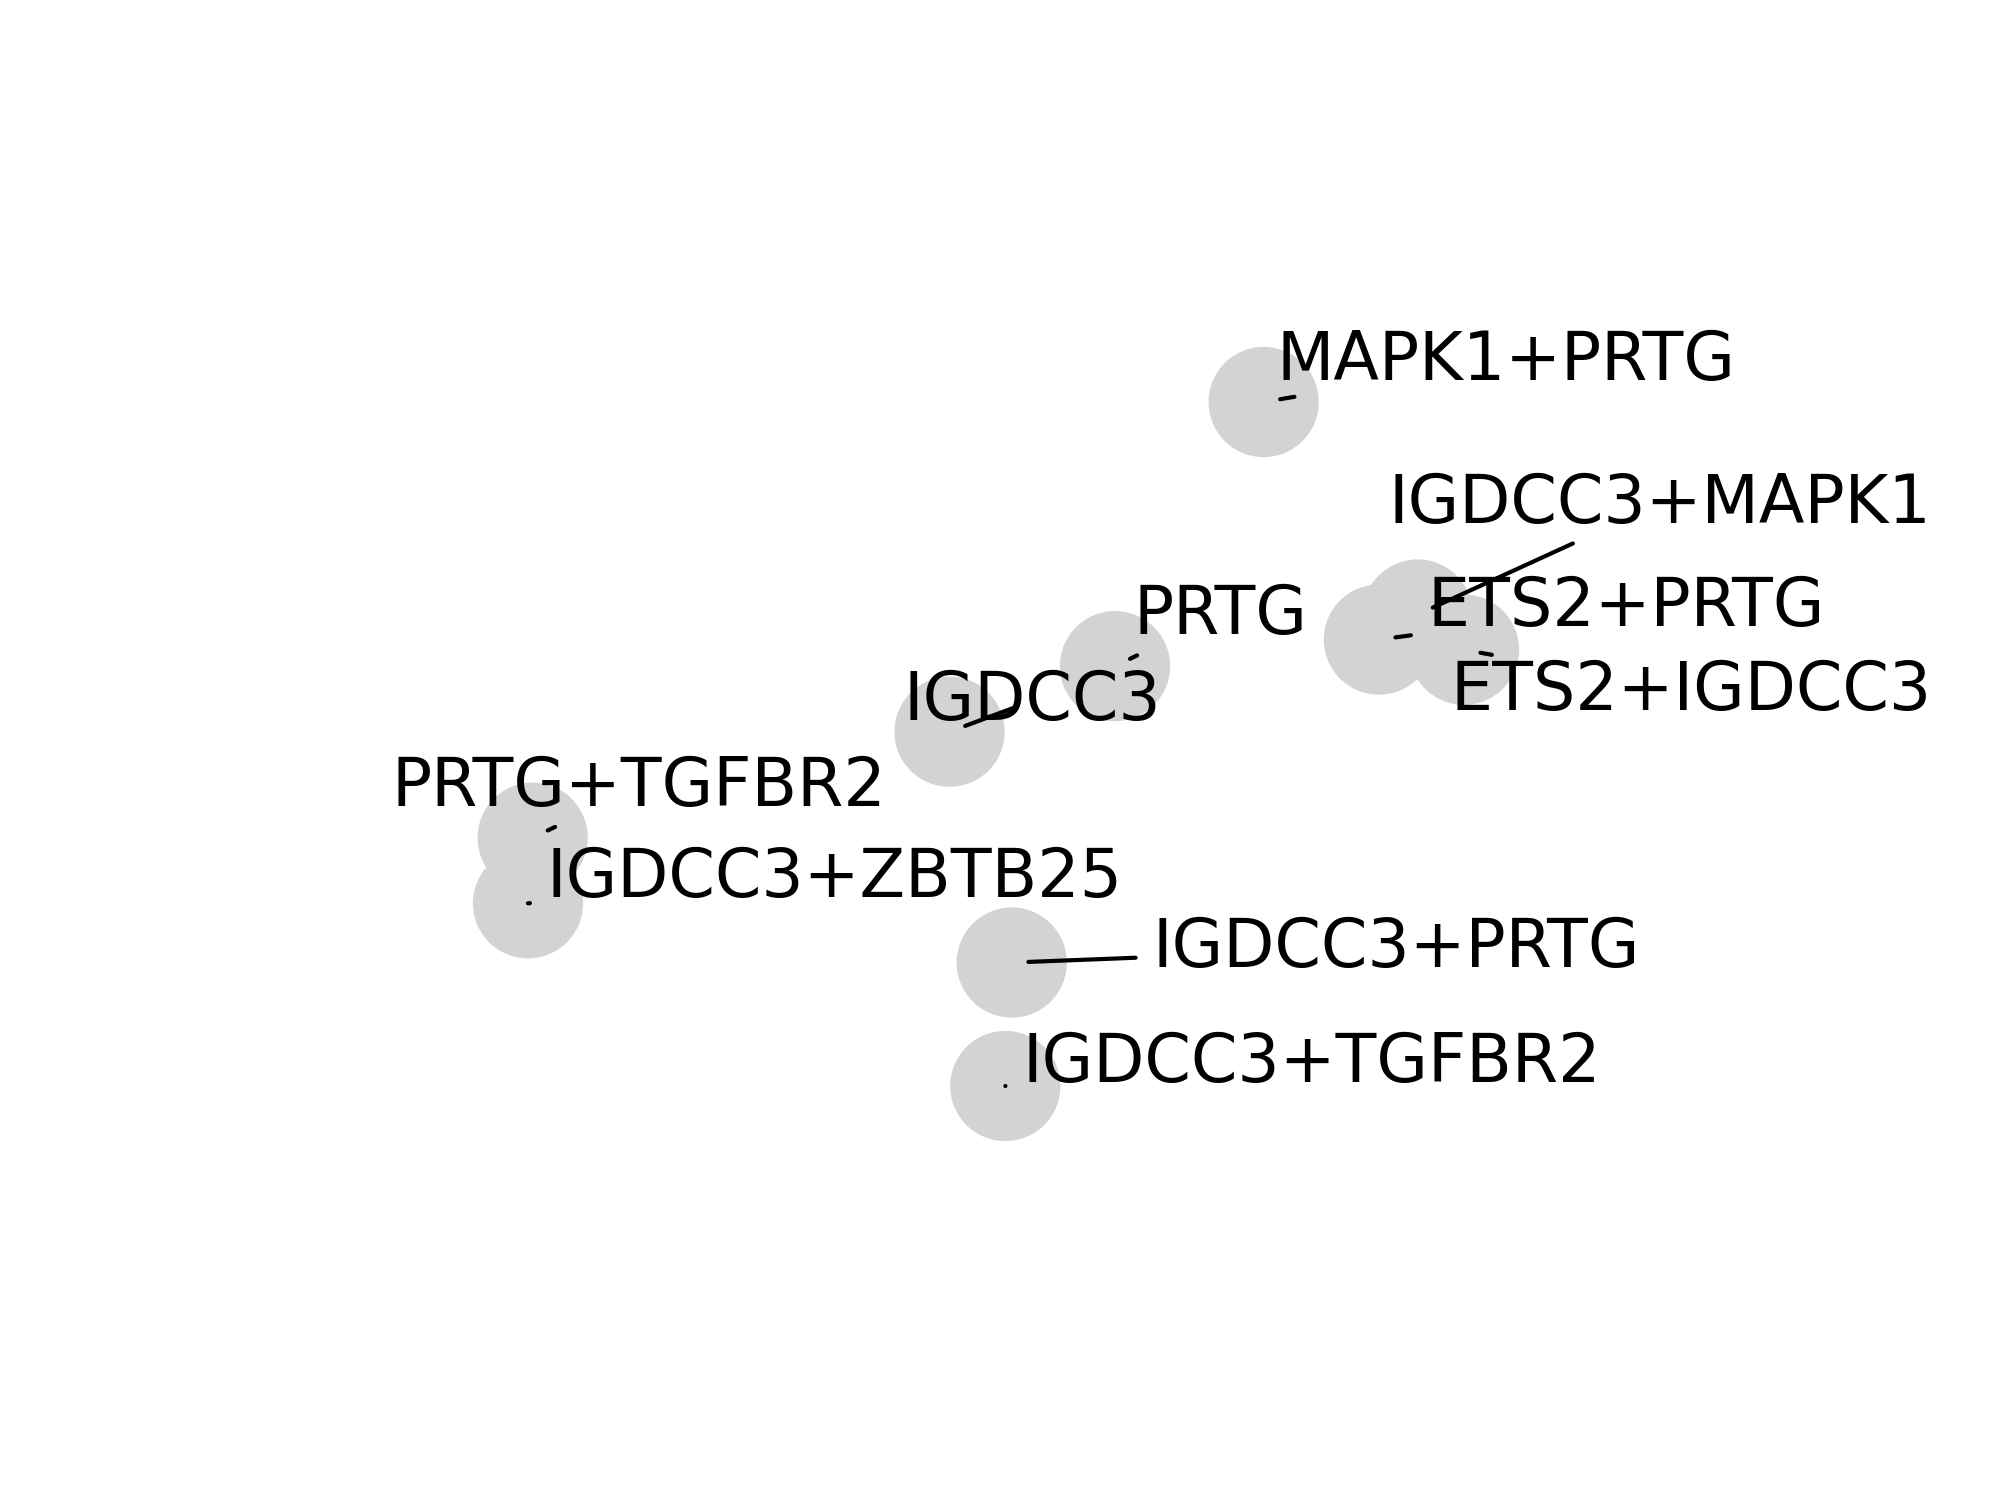

In [15]:
#TODO: Cluse-up UMAP of cluster of interest
coi = psadata_classifier[(psadata_classifier.obsm["X_umap"][:, 1] > -2)
                                & (psadata_classifier.obsm["X_umap"][:, 0] > 8)
                                & (psadata_classifier.obsm["X_umap"][:, 1] < 2)]
                                #& (psadata_classifier.obs["gene_programme"] == "Pro-growth")]

fig, ax = plt.subplots(figsize=(4, 3))
ax.margins(0.5)

#annotated = pro_growth1[pro_growth1.obs["gene_programme"] != "Unknown"]
sc.pl.umap(coi, 
           color="gene_programme", 
           show=False,
           size=700, 
           ax=ax, 
           title = "",
           palette=common_config.norman_gene_program_color_map
           )

texts = [ax.text(x, y, pert, fontsize=8) for x, y, pert in zip(coi.obsm["X_umap"][:, 0], coi.obsm["X_umap"][:, 1], coi.obs["perturbation_name"])]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

ax.get_legend().remove()
plt.savefig("norman/figures/discriminator_coi_UMAP.pdf", bbox_inches="tight", format="pdf")

In [16]:
unknown_cluster = psadata_classifier[psadata_classifier.obs["leiden"] == "11"]
unknown_perts = unknown_cluster.obs["perturbation_name"].unique()

adata.obs["Cluster of Interest"] = ["To determine" if pert in unknown_perts else "Not in cluster" for pert in adata.obs["perturbation_name"]]

sc.tl.rank_genes_groups(adata, groupby="Cluster of Interest")

In [17]:
# GSEA for genes that are UPREGULATED in the cluster of interest
enrichment_up = sc.queries.enrich(adata, "To determine", pval_cutoff=0.01, log2fc_min=0)
enrichment_up = enrichment_up[enrichment_up["source"] == "REAC"]
enrichment_up.to_csv("norman/output/reactome_enrichment_up.csv")
enrichment_up.head()

source             native  \
18   REAC  REAC:R-HSA-156827   
19   REAC   REAC:R-HSA-72706   
24   REAC   REAC:R-HSA-72737   
25   REAC   REAC:R-HSA-72613   
44   REAC  REAC:R-HSA-156902   

                                                 name       p_value  \
18  L13a-mediated translational silencing of Cerul...  1.886606e-07   
19  GTP hydrolysis and joining of the 60S ribosoma...  2.176937e-07   
24               Cap-dependent Translation Initiation  5.686039e-07   
25                  Eukaryotic Translation Initiation  5.686039e-07   
44                           Peptide chain elongation  4.996646e-06   

    significant                                        description  term_size  \
18         True  L13a-mediated translational silencing of Cerul...        112   
19         True  GTP hydrolysis and joining of the 60S ribosoma...        113   
24         True               Cap-dependent Translation Initiation        120   
25         True                  Eukaryotic Translation Initiation        120   
44         True                           Peptide chain elongation         90   

    query_size  intersection_size  effective_domain_size  precision    recall  \
18         244                 17                  10916   0.069672  0.151786   
19         244                 17                  10916   0.069672  0.150442   
24         244                 17                  10916   0.069672  0.141667   
25         244                 17                  10916   0.069672  0.141667   
44         244                 14                  10916   0.057377  0.155556   

      query              parents  
18  query_1   [REAC:R-HSA-72613]  
19  query_1   [REAC:R-HSA-72737]  
24  query_1   [REAC:R-HSA-72613]  
25  query_1   [REAC:R-HSA-72766]  
44  query_1  [REAC:R-HSA-156842]

In [18]:
# GSEA for genes that are DOWNREGULATED in the cluster of interest
enrichment_down = sc.queries.enrich(adata, "To determine", pval_cutoff=0.01, log2fc_max=0)
enrichment_down = enrichment_down[enrichment_down["source"] == "REAC"]
enrichment_down.to_csv("norman/output/reactome_enrichment_down.csv")
enrichment_down.head()

source              native                               name  \
11    REAC  REAC:R-HSA-6798695           Neutrophil degranulation   
20    REAC   REAC:R-HSA-168249               Innate Immune System   
51    REAC   REAC:R-HSA-168256                      Immune System   
331   REAC  REAC:R-HSA-9755511               KEAP1-NFE2L2 pathway   
360   REAC  REAC:R-HSA-9759194  Nuclear events mediated by NFE2L2   

          p_value  significant                        description  term_size  \
11   3.461883e-26         True           Neutrophil degranulation        476   
20   5.626260e-18         True               Innate Immune System       1099   
51   5.402252e-13         True                      Immune System       2079   
331  1.211143e-03         True               KEAP1-NFE2L2 pathway        124   
360  2.195337e-03         True  Nuclear events mediated by NFE2L2         95   

     query_size  intersection_size  effective_domain_size  precision  \
11          485                 84                  10916   0.173196   
20          485                118                  10916   0.243299   
51          485                165                  10916   0.340206   
331         485                 19                  10916   0.039175   
360         485                 16                  10916   0.032990   

       recall    query               parents  
11   0.176471  query_1   [REAC:R-HSA-168249]  
20   0.107370  query_1   [REAC:R-HSA-168256]  
51   0.079365  query_1        [REAC:0000000]  
331  0.153226  query_1  [REAC:R-HSA-9711123]  
360  0.168421  query_1  [REAC:R-HSA-9755511]

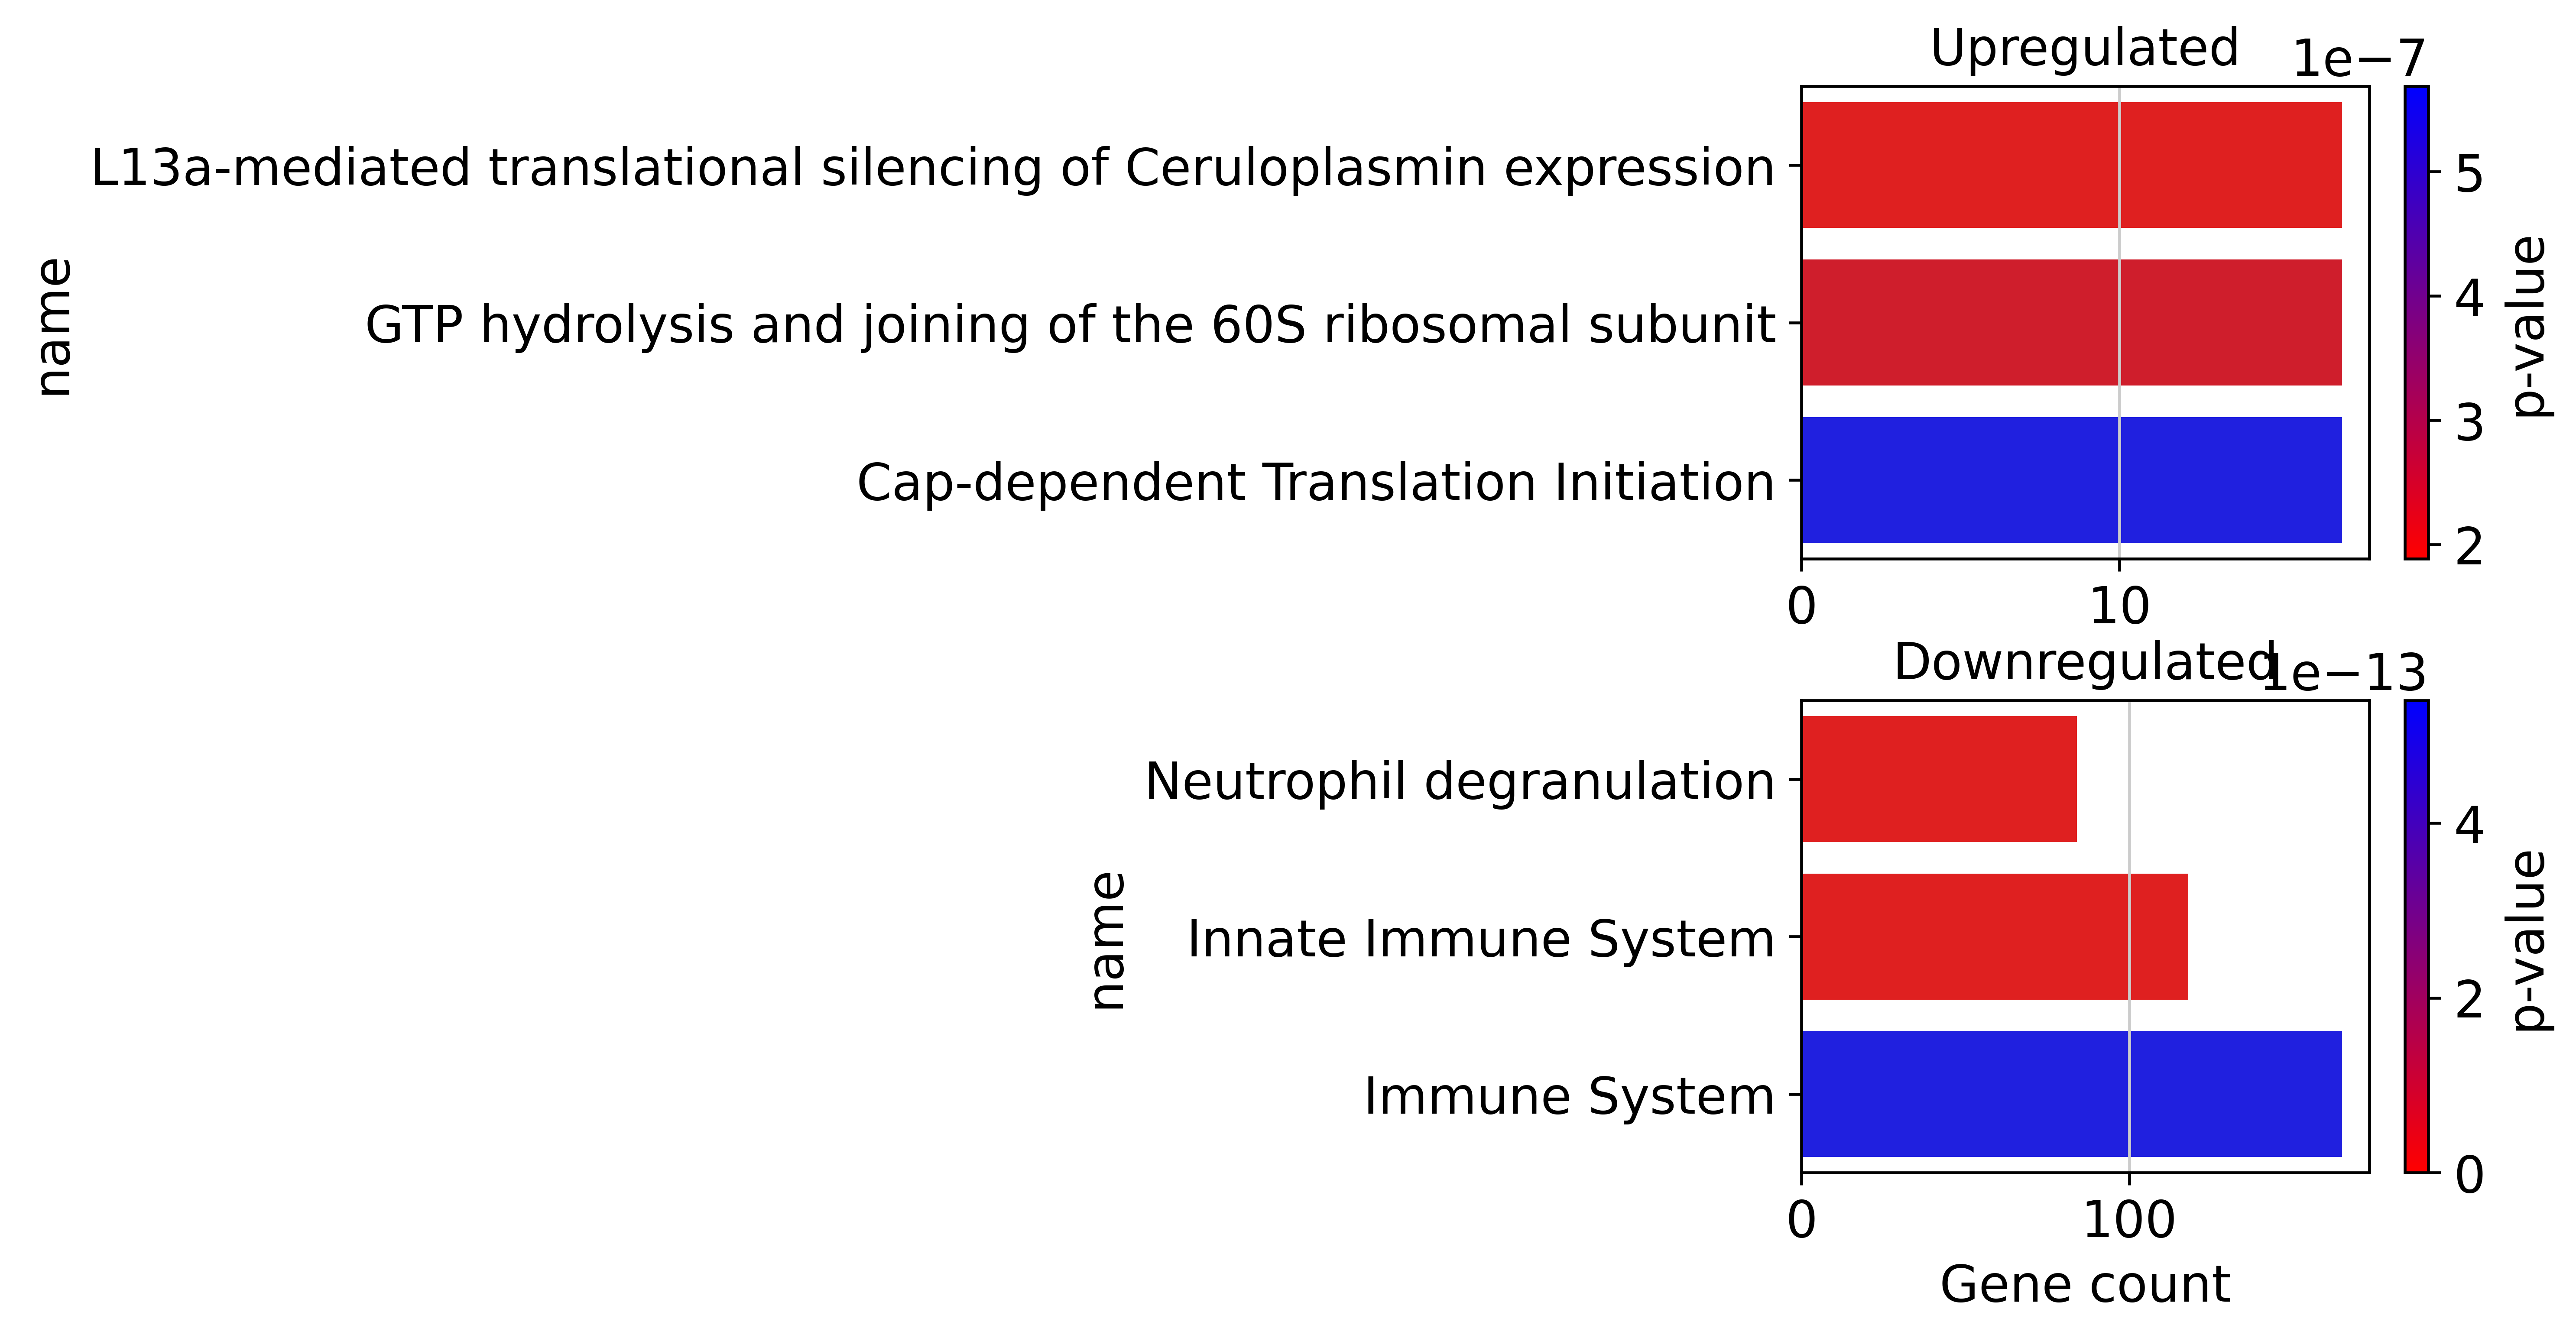

In [19]:
enrichment_up = enrichment_up.sort_values(by="p_value", ascending=True)[:3]
enrichment_down = enrichment_down.sort_values(by="p_value", ascending=True)[:3]

def make_cbar(values, cmap, ax):
    norm = plt.Normalize(vmin=values.min(), vmax=values.max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    ax.get_legend().remove()
    ax.figure.colorbar(sm, ax=ax, label="p-value")

try:
    matplotlib.colormaps.get_cmap("rb")
except ValueError:
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "blue"])
    matplotlib.colormaps.register(cmap, name="rb")

# Plot the GSEA results in two subplots
plt.subplots(2, 1, figsize=(3.5, 5.5))

plt.subplot(2, 1, 1)
enrichment_up = enrichment_up.sort_values(by="p_value")
sns.barplot(
    data=enrichment_up,
    x="intersection_size",
    y="name",
    hue="p_value",
    palette="rb",
)
make_cbar(enrichment_up["p_value"], "rb", plt.gca())
plt.title(f"Upregulated")
plt.xlabel("")


plt.subplot(2, 1, 2)
sns.barplot(
    data=enrichment_down,
    x="intersection_size",
    y="name",
    hue="p_value",
    palette="rb",
)
make_cbar(enrichment_down["p_value"], "rb", plt.gca())
plt.title(f"Downregulated")
plt.xlabel("Gene count")

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("norman/figures/gsea_cluster_of_interest.pdf", bbox_inches="tight")